# **5. Linear (Multiple Regression) Models and Analysis of Variance**

## **5.1 The Model Formula in Straight Line Regression**

We begin with the straight line regression example that appeared earlier, in section 2.1.4. First, plot the data:



In [125]:
elasticband <- data.frame(stretch=c(46,54,48,50,44,42,52),
 distance=c(148,182,173,166,109,141,166))

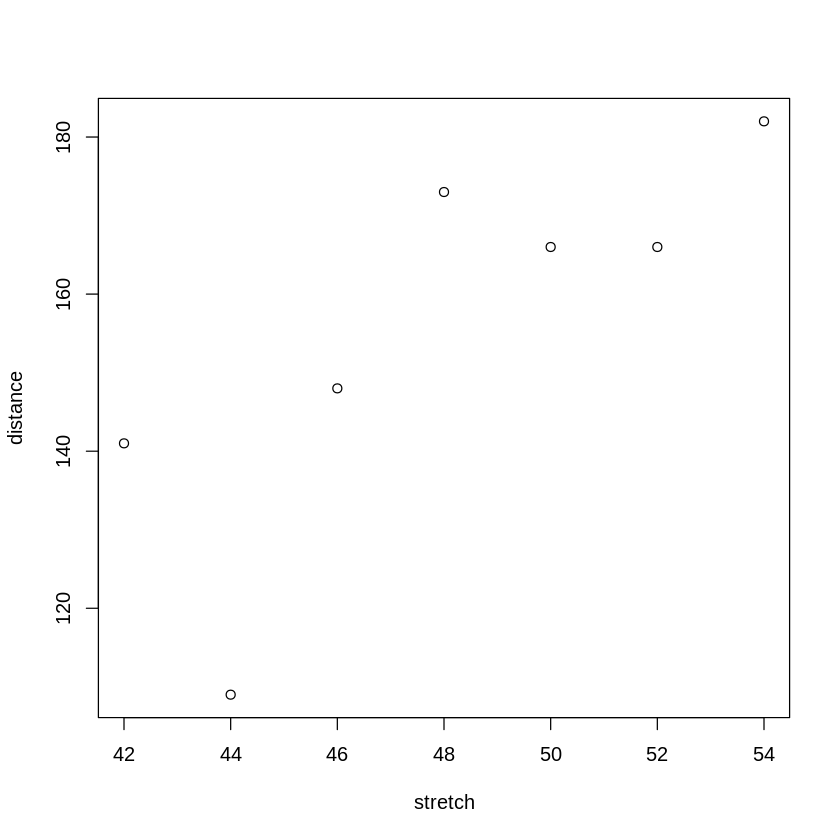

In [126]:
plot(distance ~ stretch, data = elasticband)

The code for the regression calculation is:

In [127]:
elastic.lm <- lm(distance ~ stretch, data = elasticband)
elastic.lm


Call:
lm(formula = distance ~ stretch, data = elasticband)

Coefficients:
(Intercept)      stretch  
     -63.57         4.55  


The output from the regression is an lm object, which we have called elastic.lm. Now examine a summary of the regression resuts. Notice that the output documents the model formula that was used:


In [128]:
options(digits =4)
summary(elastic.lm)


Call:
lm(formula = distance ~ stretch, data = elasticband)

Residuals:
      1       2       3       4       5       6       7 
  2.107  -0.321  18.000   1.893 -27.786  13.321  -7.214 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   -63.57      74.33   -0.86    0.431  
stretch         4.55       1.54    2.95    0.032 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.3 on 5 degrees of freedom
Multiple R-squared:  0.635,	Adjusted R-squared:  0.562 
F-statistic: 8.71 on 1 and 5 DF,  p-value: 0.0319


## **5.2 Regression Objects**

An lm object is a list of named elements. Above, we created the object elastic.lm . Here are the names of its
elements:

In [129]:
names(elastic.lm)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

Various functions are available for extracting information that you might want from the list. This is better than
manipulating the list directly. Examples are:

In [130]:
coef(elastic.lm)

(Intercept)     stretch 
    -63.571       4.554

In [131]:
resid(elastic.lm)

1        2        3        4        5        6        7 
  2.1071  -0.3214  18.0000   1.8929 -27.7857  13.3214  -7.2143

The function most often used to inspect regression output is summary(). It extracts the information that users
are most likely to want. For example, in section 5.1, we had

In [132]:
summary(elastic.lm)


Call:
lm(formula = distance ~ stretch, data = elasticband)

Residuals:
      1       2       3       4       5       6       7 
  2.107  -0.321  18.000   1.893 -27.786  13.321  -7.214 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   -63.57      74.33   -0.86    0.431  
stretch         4.55       1.54    2.95    0.032 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 16.3 on 5 degrees of freedom
Multiple R-squared:  0.635,	Adjusted R-squared:  0.562 
F-statistic: 8.71 on 1 and 5 DF,  p-value: 0.0319


There is a plot method for lm objects that gives the diagnostic information shown in Figure 17.

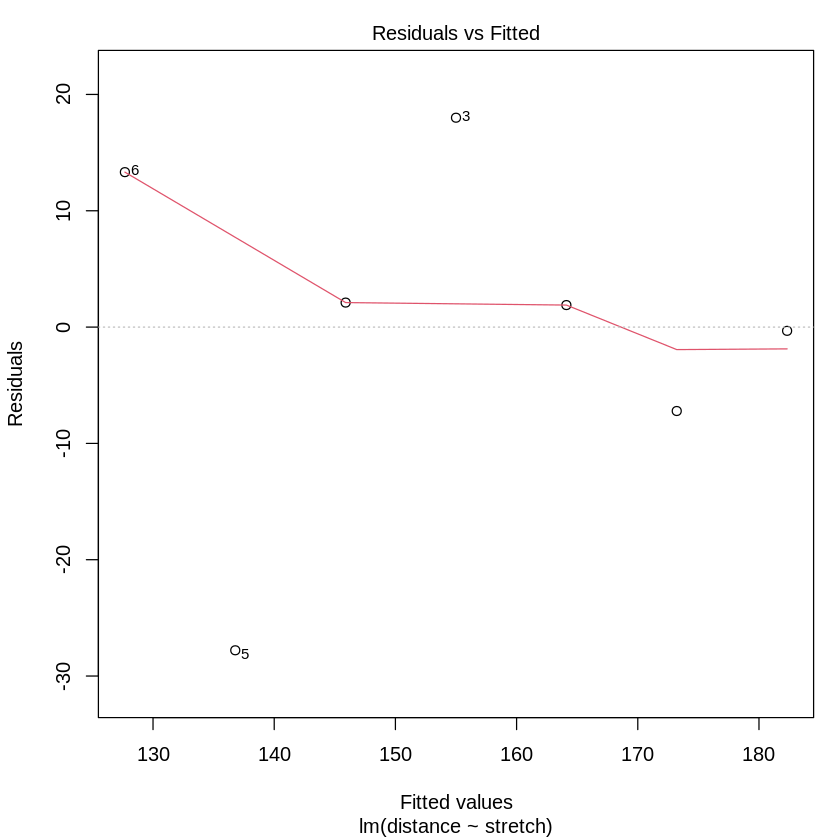

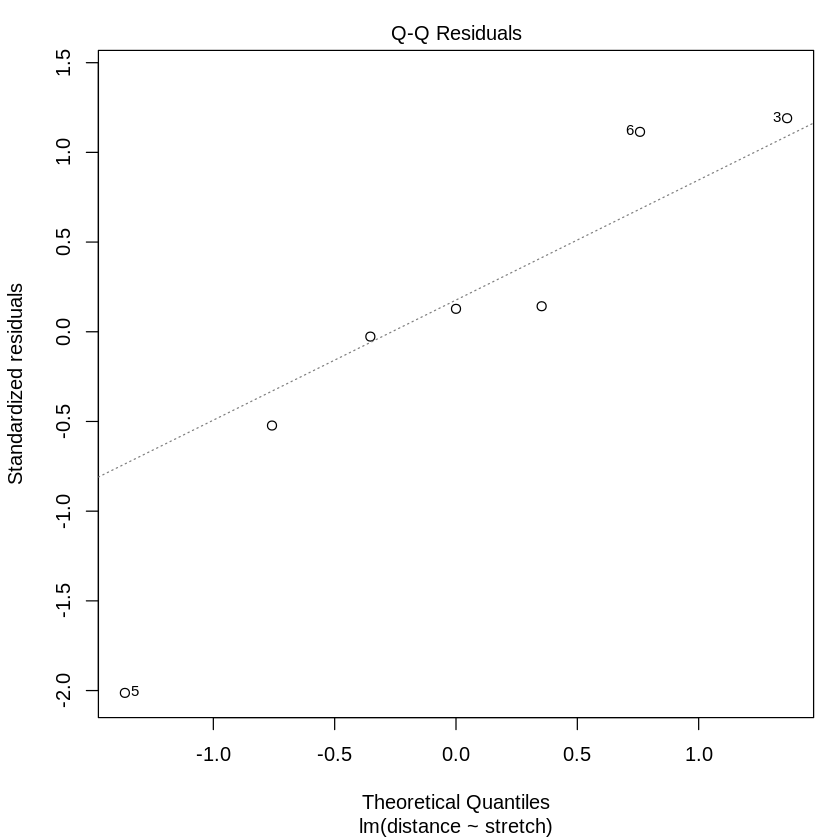

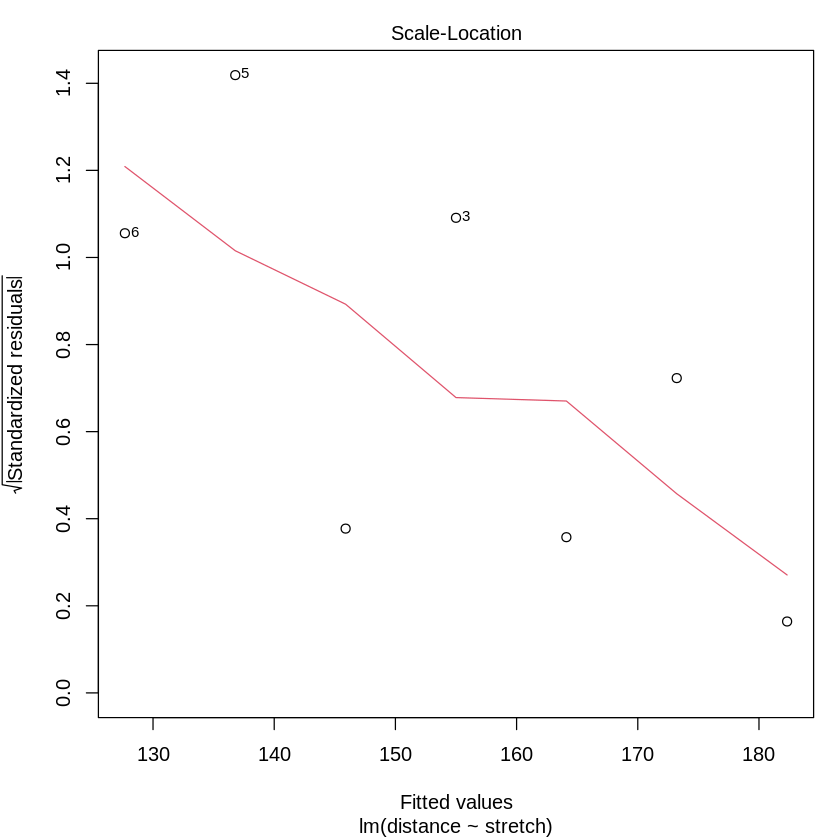

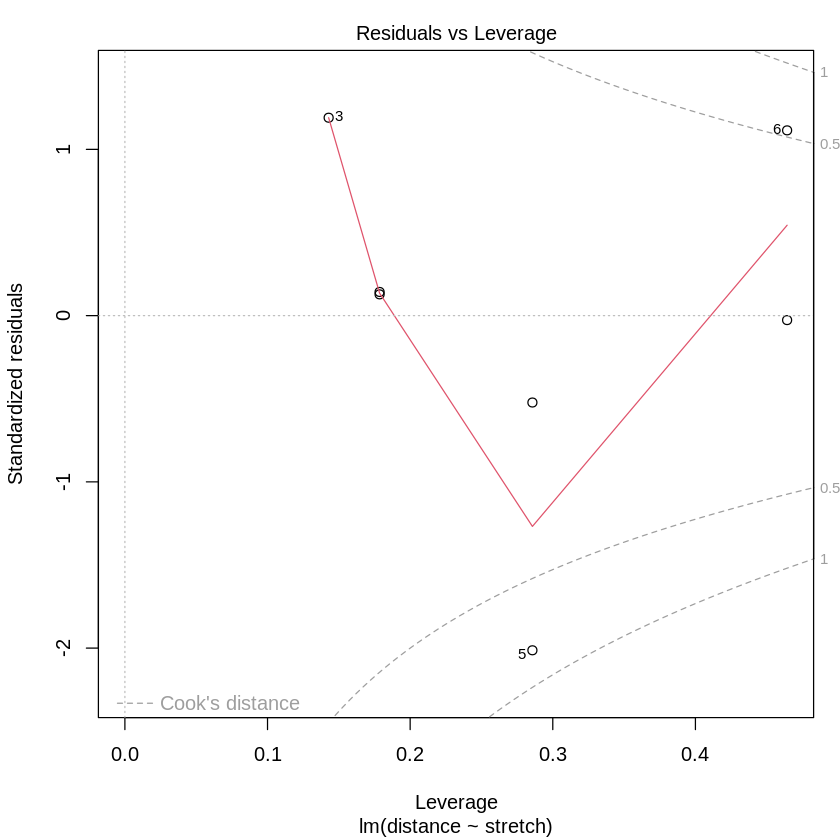

In [133]:
# x11(width=7, height=2, pointsize=10)
par(mfrow = c(1, 1), mar=c(5.1,4.1,2.1,1.1))
plot(elastic.lm)
par(mfrow=c(1,1))

By default the first, second and fourth plot use the row names to identify the three most extreme residuals. [If
explicit row names are not given for the data frame, then the row numbers are used.]

## **5.3 Model Formulae, and the X Matrix**

The model formula for the elastic band example was distance ~ stretch . The model formula is a recipe
for setting up the calculations. All the calculations described in this chapter require the use of an model matrix
or X matrix, and a vector y of values of the dependent variable. For some of the examples we discuss later, it
helps to know what the X matrix looks like. Details for the elastic band example follow.
The first 4 rows of the X matrix, with the y-vector alongside, is:
```
X             y
Stretch (mm) Distance (cm)
 1  46         148
 1  54         182
 1  48         173
 1  50         166
 ------------------
```

The model matrix relates to the part of the model that appears to the right of the equals sign. The straight line model is:

  $y  = a +bx + residual$

which we write as

$y=I [] a+x [] b + residual$


The parameters that are to be estimated are a and b. Fitted values are given by multiplying each column of the
model matrix by its corresponding parameter, i.e. the first column by a and the second column by b, and adding.
Another name is predicted values. The aim is to reproduce, as closely as possible, the values in the y-column.
The residuals are the differences between the values in the y-column and the fitted values. Least squares
regression, which is the form of regression that we describe in this course, chooses a and b so that the sum of
squares of the residuals is as small as possible.
The function model.matrix() prints out the model matrix. Thus:

In [134]:
model.matrix(distance ~ stretch, data=elasticband)

,(Intercept),stretch
1,1,46
2,1,54
3,1,48
4,1,50
5,1,44
6,1,42
7,1,52


Another possibility, with elastic.lm as in section 5.1, is:

In [135]:
model.matrix(elastic.lm)

,(Intercept),stretch
1,1,46
2,1,54
3,1,48
4,1,50
5,1,44
6,1,42
7,1,52


The following are the fitted values and residuals that we get with the estimates of a (= -63.6) and b ( = 4.55)
that result from least squares regression

Note the use of the symbol
!
ˆ y [pronounced y-hat] for predicted values.
We might alternatively fit the simpler (no intercept) model. For this we have

$y=x[] b+ e$

where e is a random variable with mean 0. The X matirx then consists of a single column, the x's.

## **5.3.1 Model Formulae in General**

Model formulae take a form such as:

y~$x+z$: lm,glm,,etc.

y~$x + fac + fac:x$ :lm,glm,aov,etc. (if fac is afactor and x is a vriable, fac:x allows a diffrent slope for each diffrent level of fac.)

Model formulae are widely used to set up most of the model calculations in R.
Notice the similarity between model formulae and the formulae that are used for specifying coplots. Thus, recall that the graph formula for a coplot that gives a plot of y against x for each diffrent combination of levels of fac1 (across the page) and fac1(up the page) is:

y ~ $x | fac1 + fac2



***5.3.2 Manipulating Model Formulae**

Model formulae can be assigned, e.g.
$formyxz <- formula(y~x+z)$

or

$formyxz <- formula(“y~x+z”)$

The argument to formula() can, as just demonstrated, be a text string. This makes it straightforward to paste
the argument together from components that are stored in text strings. For example

In [136]:
names(elasticband)

[1] "stretch"  "distance"

In [137]:
nam <- names(elasticband)
formds <- formula(paste(nam[1],"~",nam[2]))
lm(formds, data = elasticband)


Call:
lm(formula = formds, data = elasticband)

Coefficients:
(Intercept)     distance  
     26.378        0.139  


Note that graphics formulae can be manipulated in exactly the same way as model formulae.

## **5.4 Multiple Linear Regression Models**

**5.4.1 The data frame Rubber**

The data set Rubber from the MASS package is from the accelerated testing of tyre rubber26. The variables are
loss (the abrasion loss in gm/hr), hard (hardness in `Shore’ units), and tens (tensile strength in kg/sq m).
We first obtain a scatterplot matrix (Figure 18) :

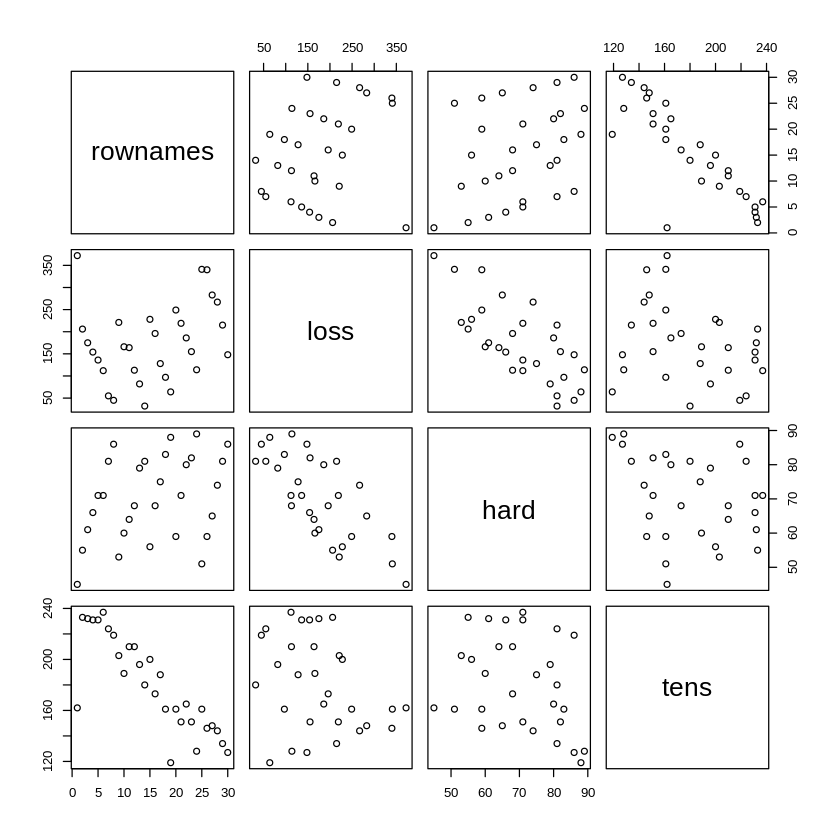

In [138]:
#Code is:
library(MASS)  # if needed (the dataset Rubber is in the MASS package)
Rubber <- read.csv("/content/Rubber.csv")
pairs(Rubber)

There is a negative correlation between loss and hardness. We proceed to regress loss on hard and tens.

In [139]:
Rubber.lm <- lm(loss ~ hard + tens, data = Rubber)
options(digits =3)
summary(Rubber.lm)


Call:
lm(formula = loss ~ hard + tens, data = Rubber)

Residuals:
   Min     1Q Median     3Q    Max 
-79.38 -14.61   3.82  19.75  65.98 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  885.161     61.752   14.33  3.8e-14 ***
hard          -6.571      0.583  -11.27  1.0e-11 ***
tens          -1.374      0.194   -7.07  1.3e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 36.5 on 27 degrees of freedom
Multiple R-squared:  0.84,	Adjusted R-squared:  0.828 
F-statistic:   71 on 2 and 27 DF,  p-value: 1.77e-11


In addition to the use of plot.lm() , note the use of termplot().

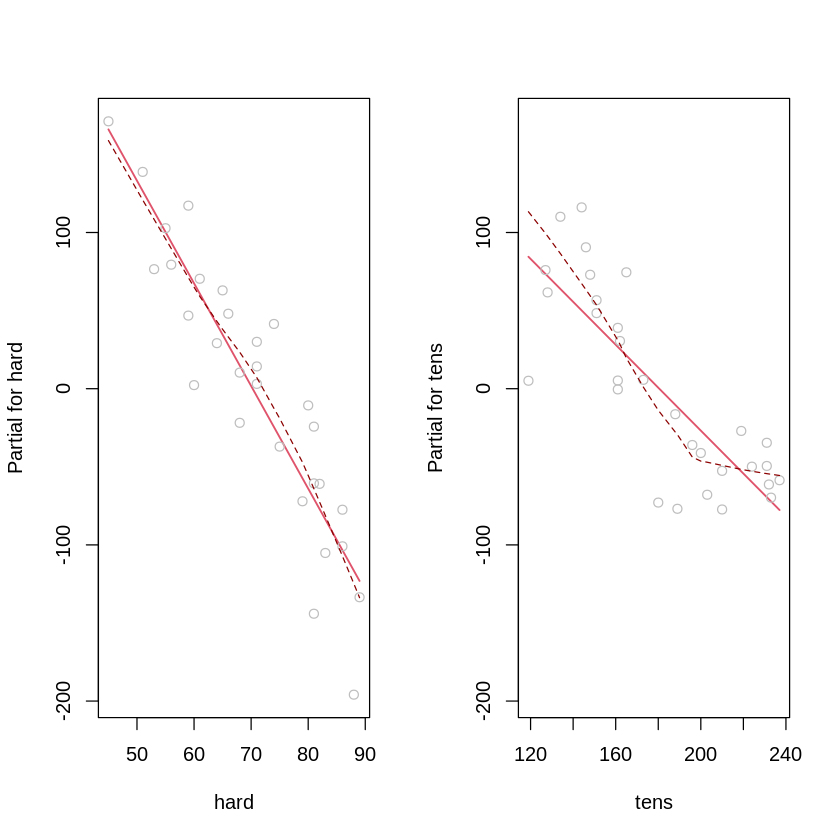

In [140]:
par(mfrow=c(1,2))
termplot(Rubber.lm, partial = TRUE, smooth = panel.smooth)
par(mfrow=c(1,1))

Above plot raises interesting questions.

plot, obtained with termplot(), showing the contribution of each of the two terms in the model, at the mean of the contributions for the other term. A smooth curve has, in each panel, been fitted through the partial residuals. There is a clear suggestions that, at the upper end of the range, the response is not linear with tensile strength.

**5.4.2 Weights of Books**

The books to which the data in the data set oddbooks(accompanying these notes) refers were chosen to curve a wide range of weight to height ratios. Here are the data:

In [141]:
oddbooks<-read.csv("/content/oddbooks.csv")

In [142]:
oddbooks

rownames,thick,height,breadth,weight
<int>,<int>,<dbl>,<dbl>,<int>
1,14,30.5,23.0,1075
2,15,29.1,20.5,940
3,18,27.5,18.5,625
4,23,23.2,15.2,400
5,24,21.6,14.0,550
6,25,23.5,15.5,600
7,28,19.7,12.6,450
8,28,19.8,12.6,450
9,29,17.3,10.5,300


In [143]:
#As Thickeness increases, weight reduces.

logbooks <- log(oddbooks) # We might expect weight to be
# proportional to thick * height * width
logbooks.lm1<-lm(weight~thick,data=logbooks)
summary(logbooks.lm1)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),9.69,0.708,13.7,8.35e-08
thick,-1.07,0.219,-4.9,6.26e-04


In [144]:
 logbooks.lm2<-lm(weight~thick+height,data=logbooks)
 summary(logbooks.lm2)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.263,3.552,-0.356,0.7303
thick,0.313,0.472,0.662,0.5243
height,2.114,0.678,3.117,0.0124


In [145]:
 logbooks.lm3<-lm(weight~thick+height+breadth,data=logbooks)
 summary(logbooks.lm3)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-0.719,3.216,-0.224,0.829
thick,0.465,0.434,1.070,0.316
height,0.154,1.273,0.121,0.907
breadth,1.877,1.070,1.755,0.117


Does weight increase in proportion to thickness, height, and width multiplied together? The relationship between thickness, height, and width is so strong that if we try to use more than one of them to explain weight, the results become uncertain. This is because they provide very similar information, as shown in the scatterplot matrix. When we analyze weight against height and width individually, we get reasonable results. However, the coefficient for thickness in the regression analysis is influenced solely by how the data was chosen. This highlights the importance of how data is collected when interpreting regression coefficients. While regression equations based on observational data might work well for predictions, the individual coefficients can be misleading. This became evident in Lalonde's analyses in 1986, where the regression estimate for the treatment effect had a statistically significant result but in the wrong direction when compared to non-experimental controls. To address this, Dehejia and Wahba proposed using scores (or 'propensities') to identify comparable subsets of data. By focusing on subsets where the covariates overlap significantly, we can estimate treatment effects more accurately. However, it's still difficult to guarantee that any method will always provide the correct answer.

## 5.5 Polynomial and Spline Regression

Similar to multiple linear regression, certain calculations can also model curved responses. These curves are formed by combining transformed values in a linear way. It's worth noting that highly complex polynomial curves often aren't ideal. Instead, spline curves, which connect lower-order polynomial curves (usually cubics) in a smooth manner, are generally preferred

**5.5.1 Polynomial Terms in Linear Models**

The data frame seedrates27 (DAAG package) gvies, for each of a number of different seeding rates, the
number of barley grain per head.


rownames,rate,grain
<int>,<int>,<dbl>
1,50,21.2
2,75,19.9
3,100,19.2
4,125,18.4
5,150,17.9


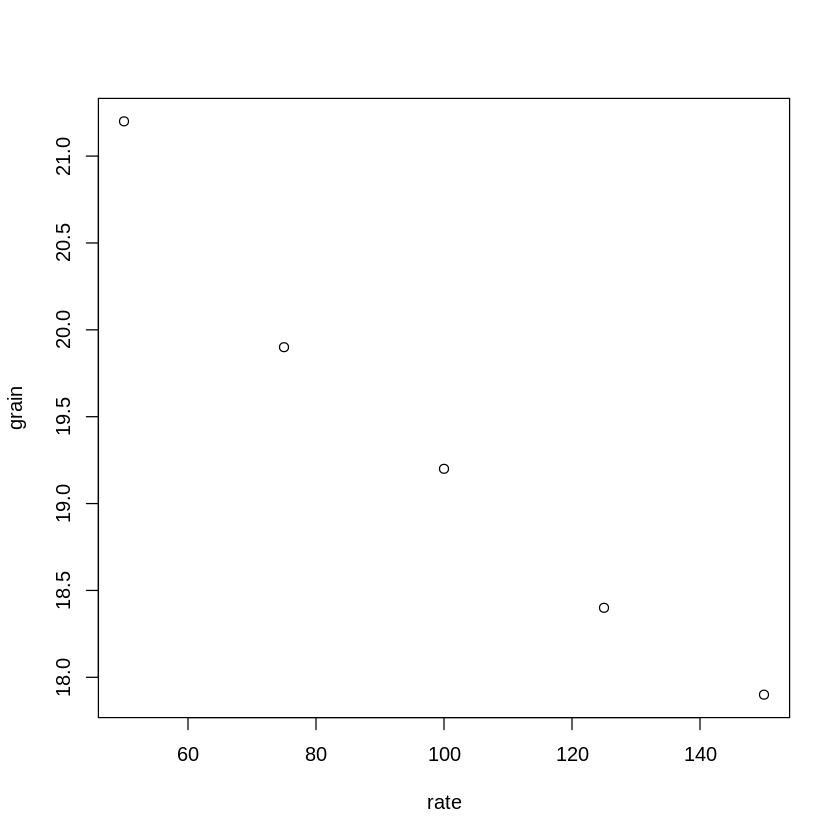

In [146]:
seedrates <- read.csv("/content/seedrates.csv")
seedrates
plot(grain ~ rate, data=seedrates) # Plot the data

We will need an X-matrix with a column of ones, a column of values of rate, and a column of values of
rate2

. For this, both rate and I(rate^2) must be included in the model formula.

In [147]:
seedrates.lm2 <- lm(grain ~ rate+I(rate^2), data=seedrates)
summary(seedrates.lm2)


Call:
lm(formula = grain ~ rate + I(rate^2), data = seedrates)

Residuals:
       1        2        3        4        5 
 0.04571 -0.12286  0.09429 -0.00286 -0.01429 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 24.060000   0.455694   52.80  0.00036 ***
rate        -0.066686   0.009911   -6.73  0.02138 *  
I(rate^2)    0.000171   0.000049    3.50  0.07294 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.115 on 2 degrees of freedom
Multiple R-squared:  0.996,	Adjusted R-squared:  0.992 
F-statistic:  256 on 2 and 2 DF,  p-value: 0.0039


,(Intercept),rate,I(rate^2)
1,1,50,2500
2,1,75,5625
3,1,100,10000
4,1,125,15625
5,1,150,22500


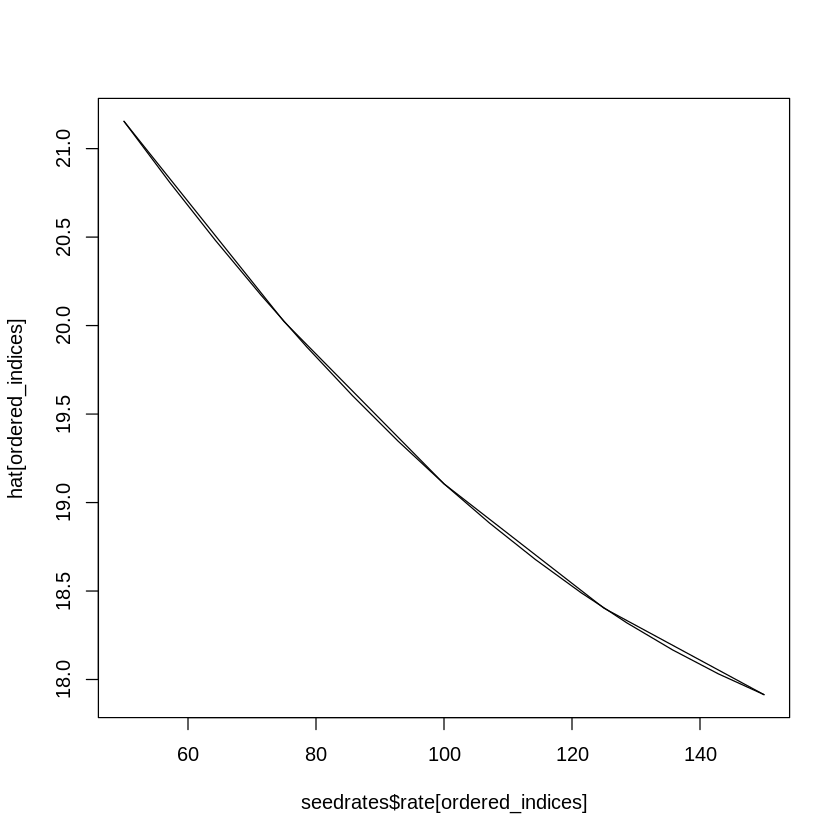

In [148]:
hat <- predict(seedrates.lm2)
ordered_indices <- order(seedrates$rate)
plot(seedrates$rate[ordered_indices], hat[ordered_indices], type = "l")
lines(spline(seedrates$rate[ordered_indices], hat[ordered_indices]))
# Placing the spline fit through the fitted points allows a smooth curve.
# For this to work the values of seedrates$rate must be ordered.
model.matrix(grain ~ rate + I(rate^2), data = seedrates)


This was a (small) extension of linear models, to handle a specific form of non-linear relationship. Any
transformation can be used to form columns of the model matrix. Thus, an x
3
 column might be added.

Once the model matrix has been formed, we are limited to taking linear combinations of columns.

**5.5.2 What order of polynomial?**

A polynomial of degree 2, i.e. a quadratic curve, looked about right for the above data. How does one check?
One way is to fit polynomials, e.g. of each of degrees 1 and 2, and compare them thus:

In [149]:
seedrates.lm1<-lm(grain~rate,data=seedrates)
seedrates.lm2<-lm(grain~rate+I(rate^2),data=seedrates)
anova(seedrates.lm2,seedrates.lm1)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2,0.0263,NA,NA,NA,NA
2,3,0.1870,-1,-0.161,12.2,0.0729


The F-value suggests that there's a significant difference, but we don't have enough data points to be completely certain that a quadratic model is better than a linear one. However, the research paper where this data is from provides another measure of error (0.17 with 35 degrees of freedom), based on 8 replicated experiments. When we compare the change in the sum of squares (0.1607, with 1 degree of freedom) to this error measure, the F-value becomes 5.4, with 1 and 35 degrees of freedom, and the p-value is 0.024. The increase in the number of degrees of freedom compensates for the decrease in the F-statistic.

In [150]:
# However we have an independent estimate of the error mean
# square. The estimate is 0.17^2, on 35 df.
1-pf(0.16/0.17^2, 1, 35)

[1] 0.0244

The R-squared value for the straight line model was 0.972. This might sound impressive, but considering the precision of our data, it wasn't satisfactory. R-squared alone isn't a reliable indicator of model adequacy. Generally, R-squared tends to increase as the range of dependent variable values widens, simply because there's more variability to explain. A predictive model should be considered adequate when the standard errors of predicted values are sufficiently low, rather than relying on R-squared to meet some arbitrary threshold

**5.5.3 Pointwise confidence bounds for the fitted curve**

Here is code that gives pointwise 95% confidence bounds. Note that these do not combine to give a confidence
region for the total curve! The construction of such a region is a much more complicated task!



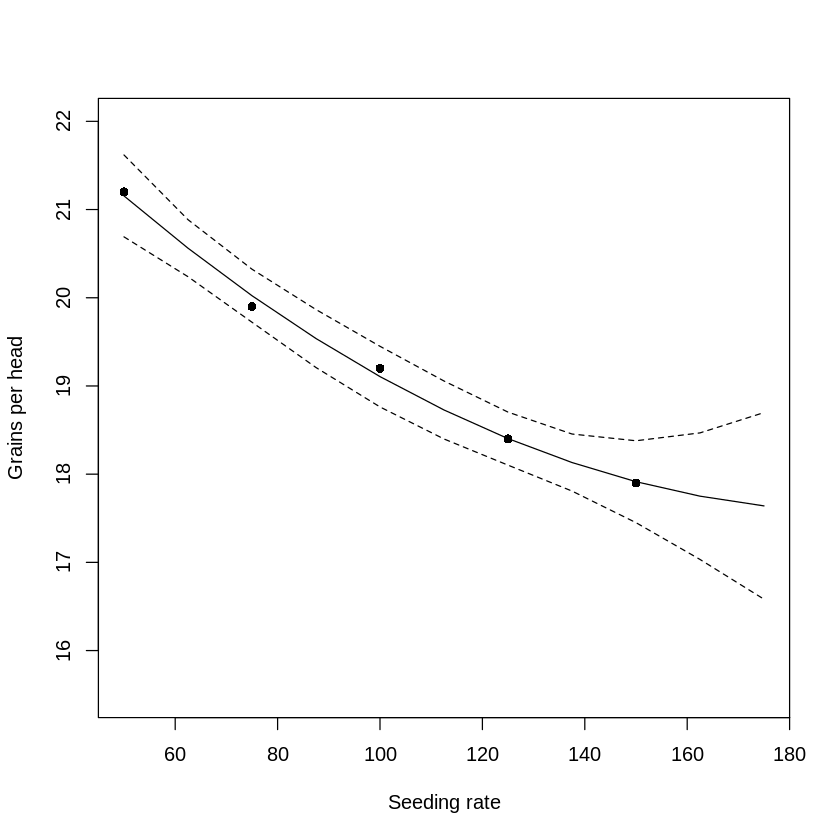

In [151]:
plot(grain ~ rate, data = seedrates, pch = 16, xlim = c(50, 175), ylim
 = c(15.5, 22),xlab="Seeding rate",ylab="Grains per head")
new.df <- data.frame(rate = c((4:14) * 12.5))
seedrates.lm2 <- lm(grain ~ rate + I(rate^2), data = seedrates)
pred2 <- predict(seedrates.lm2, newdata = new.df, interval="confidence")
hat2 <- data.frame(fit=pred2[,"fit"],lower=pred2[,"lwr"], upper=pred2[,"upr"])
attach(new.df)
lines(rate, hat2$fit)
lines(rate,hat2$lower,lty=2)
lines(rate, hat2$upper,lty=2)
detach(new.df)

The extrapolation has deliberately been taken beyond the range of the data, in order to show how the confidence
bounds spread out. Confidence bounds for a fitted line spread out more slowly, but are even less believable!

**5.5.4 Spline Terms in Linear Models**

By now, you've probably noticed that linear models can be used to fit terms that might not seem linear at first. We've seen this with fitting polynomial functions. Now, we're taking it further with spline functions. These splines are made by connecting cubic curves smoothly, with connection points called 'knots'. Once the knots are set, spline functions can be made by combining basis functions, which are transformations of the variable. You can find the dataset 'cars' in the datasets package.

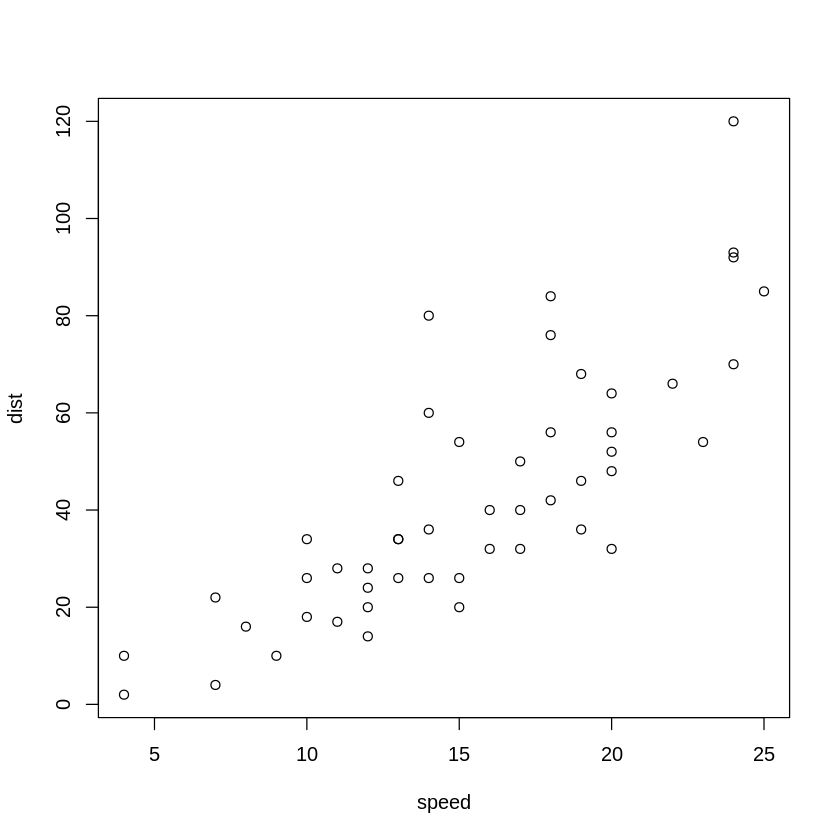

In [152]:
cars <- read.csv("/content/cars.csv")
plot(dist ~ speed, data = cars)

In [153]:
library(splines)
cars.lm <- lm(dist ~ bs(speed), data = cars)  # By default , there are no knots
summary(cars.lm)


Call:
lm(formula = dist ~ bs(speed), data = cars)

Residuals:
   Min     1Q Median     3Q    Max 
-26.67  -9.60  -2.23   7.08  44.69 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.76       9.82    0.28    0.780    
bs(speed)1     31.47      23.97    1.31    0.196    
bs(speed)2     29.63      15.80    1.87    0.067 .  
bs(speed)3     89.41      13.55    6.60  3.6e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.2 on 46 degrees of freedom
Multiple R-squared:  0.673,	Adjusted R-squared:  0.652 
F-statistic: 31.6 on 3 and 46 DF,  p-value: 3.07e-11



Call:
lm(formula = dist ~ bs(speed), data = cars)

Residuals:
   Min     1Q Median     3Q    Max 
-26.67  -9.60  -2.23   7.08  44.69 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)     2.76       9.82    0.28    0.780    
bs(speed)1     31.47      23.97    1.31    0.196    
bs(speed)2     29.63      15.80    1.87    0.067 .  
bs(speed)3     89.41      13.55    6.60  3.6e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.2 on 46 degrees of freedom
Multiple R-squared:  0.673,	Adjusted R-squared:  0.652 
F-statistic: 31.6 on 3 and 46 DF,  p-value: 3.07e-11


[1] "fit"            "se.fit"         "df"             "residual.scale"

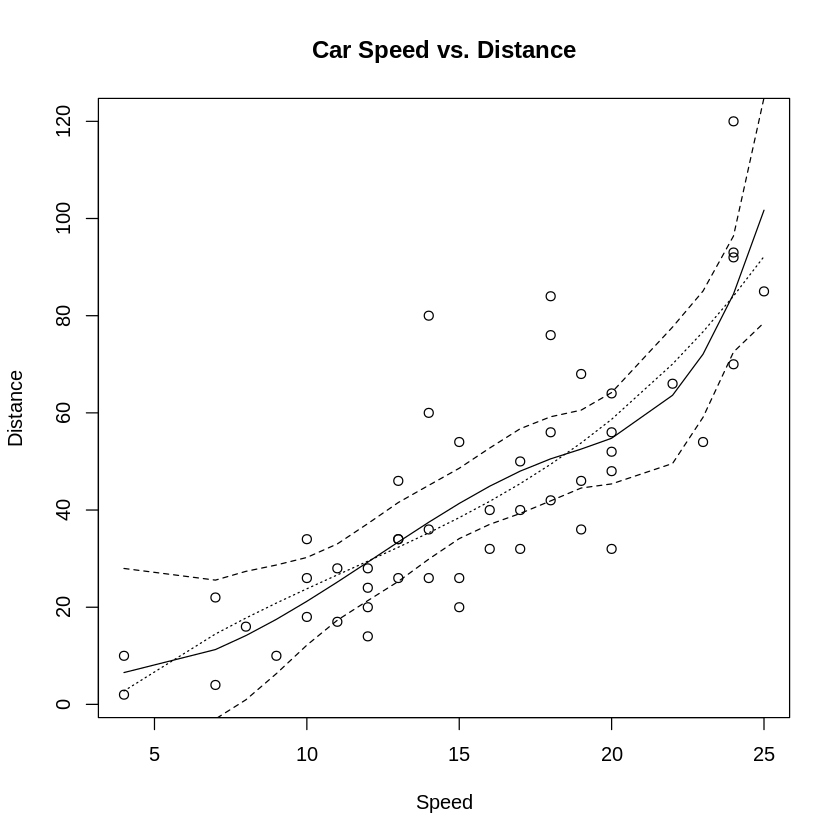

In [154]:
# Create a scatter plot of speed vs. distance
plot(cars$speed, cars$dist, xlab = "Speed", ylab = "Distance", main = "Car Speed vs. Distance")

# Fit a linear regression model without knots
cars.lm <- lm(dist ~ bs(speed), data = cars)
summary(cars.lm)

# Predicted values
hat <- predict(cars.lm)

# Add the regression line to the plot
lines(cars$speed, hat, lty = 3)   # NB assumes values of speed are sorted

# Fit a spline regression model with 5 knots
cars.lm5 <- lm(dist ~ bs(speed, 5), data = cars)

ci5 <- predict(cars.lm5, interval = "confidence", se.fit = TRUE)
names(ci5)

lines(cars$speed, ci5$fit[,"fit"])

lines(cars$speed, ci5$fit[,"lwr"],lty=2)

lines(cars$speed, ci5$fit[,"upr"],lty=2)


## **5.6 Using Factors in R Models**


Factors are important in R models, especially for dealing with categorical variables. Let's say we have data from an experiment comparing houses with and without cavity insulation. While we typically wouldn't use the lm model for these calculations, let's use it as a simple example to show how we choose a baseline level and set contrasts. Different choices can lead to equivalent models, but the output will have different numbers, requiring different interpretations.

We begin by entering the data from the command line:

In [155]:
insulation  <- factor(c(rep("without",8), rep("with",7)))
# 8 without , then 7 with
# "with" preceded "without"  in alphanumeric order, & is the baseline

kwh <- c(10225, 10689, 14683, 6584, 8541, 12086, 12467, 12669, 9708, 6700, 4307, 10315, 8017, 8162, 8022)
kwh
#To formulate this as a regression model, we take kWh as the dependent variable, and the factor insulation as the
#explanatory variable.

insulation.lm <- lm(kwh ~ insulation)
summary(insulation.lm, corr=F)

[1] 10225 10689 14683  6584  8541 12086 12467 12669  9708  6700  4307 10315
[13]  8017  8162  8022


Call:
lm(formula = kwh ~ insulation)

Residuals:
   Min     1Q Median     3Q    Max 
 -4409   -979    132   1575   3690 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9442        598   15.78  7.4e-10 ***
insulation1    -1551        598   -2.59    0.022 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2310 on 13 degrees of freedom
Multiple R-squared:  0.341,	Adjusted R-squared:  0.29 
F-statistic: 6.73 on 1 and 13 DF,  p-value: 0.0223


The p-value is 0.022, suggesting that we can tell the difference between the two types of houses (p < 0.05). Now, let's understand what the numbers mean. The intercept of 7890 and the insulation value of 3103 need some explanation. By default, factor levels are considered in alphabetical order, and the first level serves as the baseline. In this case, "with" comes before "without," so "with" is the baseline. Here's what it means:
- Average for Insulated Houses = 7980
- To find the estimate for uninsulated houses, we add 3103 to 7980, giving us 10993.
- The standard error of the difference is 1196.

**5.6.1 The Model Matrix**


It often helps to keep in mind the model matrix or X matrix. Here are the X and the y that are used for the
calculations. Note that the first eight data values were all withouts:

In [156]:
model.matrix(kwh ~ insulation)

,(Intercept),insulation1
1,1,-1
2,1,-1
3,1,-1
4,1,-1
5,1,-1
6,1,-1
7,1,-1
8,1,-1
9,1,1
10,1,1


**5.6.2 Other Choices of Contrasts**

There are different ways to arrange the X matrix, or in simpler terms, different ways to organize the data. In technical language, these are called contrasts. One straightforward option is to make "without" the first factor level, meaning it becomes the starting point or baseline. To do this, you would specify:


In [157]:
insulation <- relevel(insulation, ref = "without")
# Make "without" the baseline



With "sum" contrasts, the baseline is the average over all factor levels. The effect for the first level is left out; you have to figure it out by subtracting the sum of the other effects. Here's what you get when you use "sum" contrasts.


In [158]:
 options(contrasts = c("contr.sum", "contr.poly"), digits = 2)
 # Try the `sum’ contrasts
 insulation <- factor(insulation, levels=c("without", "with"))
 # Make `without' the baseline
 insulation.lm <- lm(kwh ~ insulation)
 summary(insulation.lm, corr=F)


Call:
lm(formula = kwh ~ insulation)

Residuals:
   Min     1Q Median     3Q    Max 
 -4409   -979    132   1575   3690 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)     9442        598   15.78  7.4e-10 ***
insulation1     1551        598    2.59    0.022 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2310 on 13 degrees of freedom
Multiple R-squared:  0.341,	Adjusted R-squared:  0.29 
F-statistic: 6.73 on 1 and 13 DF,  p-value: 0.0223


Here's what it means:
- The average of the mean for "without" and "with" insulation is 9442.
- To estimate for houses without insulation (the first level), add 1551 to 9442 to get 10993.
- The sum of the effects is one. So, the effect for the second level ("with") is -1551. Hence, to estimate for houses with insulation (the first level), subtract 1551 from 9442 to get 7980.
- Sum contrasts are also known as "analysis of variance" contrasts.
- You can set the choice of contrasts for each factor separately using a statement like:

- There are helmert contrasts available, but they're not intuitive and are rarely useful, despite being the default in S-PLUS. Beginners should steer clear of them.

In [159]:
insulation <- C(insulation, contr=treatment)
insulation

[1] without without without without without without without without with   
[10] with    with    with    with    with    with   
attr(,"contrasts")
[1] contr.treatment
Levels: without with

## **5.7 Multiple Lines – Different Regression Lines for Different Species**



The terms on the right of the model formula can be variables, factors, or interactions between variables and factors. In this example, we use this flexibility to fit different lines to different subsets of the data.

In the following example, we have weights for two species: Stellena styx (a porpoise species) and Delphinus delphis (a dolphin species). Let $x_1$ represent a variable that takes the value 0 for Delphinus delphis and 1 for Stellena styx. Let $x_2$ represent body weight. The possibilities we may want to consider are:

A. A single line: $y = a + b x_2$
B. Two parallel lines: $y = a_1 + a_2 x_1 + b x_2$
   (For the first group (Stellena styx; $x_1 = 0$), the constant term is $a_1$, while for the second group (Delphinus delphis; $x_1 = 1$), the constant term is $a_1 + a_2$.)

C. Two separate lines: $y = a_1 + a_2 x_1 + b_1 x_2 + b_2 x_1 x_2$
   (For the first group (Delphinus delphis; $x_1 = 0$), the constant term is $a_1$ and the slope is $b_1$. For the second group (Stellena styx; $x_1 = 1$), the constant term is $a_1 + a_2$, and the slope is $b_1 + b_2$.)

We present results from fitting the first two of these models, i.e., A and B:

species,logweight,logheart
<fct>,<dbl>,<dbl>
Stellena styx,3.6,3.0
Stellena styx,3.7,3.1
Stellena styx,3.7,3.0
Stellena styx,3.8,3.3
Stellena styx,3.9,2.8
Stellena styx,3.7,3.1
Stellena styx,3.9,3.5
Stellena styx,3.7,3.9
Delphinus delphis,4.0,3.7



Call:
lm(formula = logheart ~ logweight, data = dolphins)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.6451 -0.1267 -0.0321  0.1222  0.6392 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)   -1.171      2.224   -0.53     0.61  
logweight      1.189      0.582    2.04     0.06 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.289 on 14 degrees of freedom
Multiple R-squared:  0.23,	Adjusted R-squared:  0.175 
F-statistic: 4.18 on 1 and 14 DF,  p-value: 0.0603


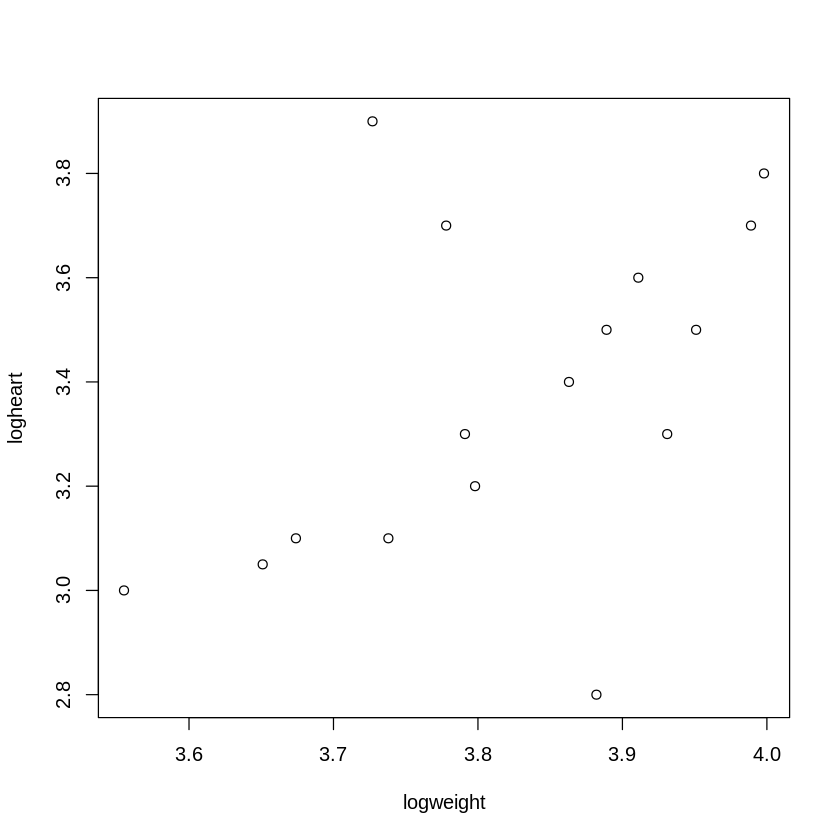

In [160]:
dolphins <- data.frame(
  species = factor(rep(c("Stellena styx", "Delphinus delphis"), each = 8)), # Adjusted each parameter to 8
  logweight = c(3.555, 3.738, 3.651, 3.791, 3.882, 3.674, 3.889, 3.727,
                3.989, 3.951, 3.778, 3.911, 3.798, 3.863, 3.931, 3.998), # Added more logweight values
  logheart = c(3.0, 3.1, 3.05, 3.3, 2.8, 3.1, 3.5, 3.9, 3.7, 3.5, 3.7, 3.6, 3.2, 3.4, 3.3, 3.8) # Adjusted logheart values
)


dolphins

plot(logheart ~ logweight, data = dolphins) # Plot the data
options(digits = 4)
cet.lm1 <- lm(logheart ~ logweight, data = dolphins)
summary(cet.lm1, corr = FALSE)


In [161]:
#For model B (parallel lines) we have

cet.lm2 <- lm(logheart ~ factor(species) + logweight, data=dolphins)
model.matrix(cet.lm2)

,(Intercept),factor(species)1,logweight
1,1,-1,3.555
2,1,-1,3.738
3,1,-1,3.651
4,1,-1,3.791
5,1,-1,3.882
6,1,-1,3.674
7,1,-1,3.889
8,1,-1,3.727
9,1,1,3.989
10,1,1,3.951


Enter **summary(cet.lm2)** to get an output summary, and **plot(cet.lm2)** to plot diagnostic information for
this model.

For model C, the statement is

In [162]:
 cet.lm3 <- lm(logheart ~ factor(species) + logweight +
 factor(species):(logweight), data=dolphins)
# Check what the model matrix looks like:
model.matrix(cet.lm3)

,(Intercept),factor(species)1,logweight,factor(species)1:logweight
1,1,-1,3.555,-3.555
2,1,-1,3.738,-3.738
3,1,-1,3.651,-3.651
4,1,-1,3.791,-3.791
5,1,-1,3.882,-3.882
6,1,-1,3.674,-3.674
7,1,-1,3.889,-3.889
8,1,-1,3.727,-3.727
9,1,1,3.989,3.989
10,1,1,3.951,3.951


In [163]:
#Now see why one should not waste time on model C.

 anova(cet.lm1,cet.lm2,cet.lm3)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,14,1.171,NA,NA,NA,NA
2,13,1.083,1,0.08770,0.9830,0.3410
3,12,1.071,1,0.01234,0.1384,0.7164


## **5.8 aov models (Analysis of Variance)**


The class of models that can be directly fitted as aov models is quite limited. In essence, aov provides, for data
where all combinations of factor levels have the same number of observations, another view of an lm model.
One can however specify the error term that is to be used in testing for treatment effects. See section 5.8.2
below.
By default, R uses the treatment contrasts for factors, i.e. the first level is taken as the baseline or reference
level. A useful function is relevel(). The parameter ref can be used to set the level that you want as the
reference level

**5.8.1 Plant Growth Example**

Here is a simple randomised block design:


The following objects are masked from PlantGrowth (pos = 4):

    group, weight


The following objects are masked from PlantGrowth (pos = 5):

    group, weight




            Df Sum Sq Mean Sq F value Pr(>F)  
group        2   3.77   1.883    4.85  0.016 *
Residuals   27  10.49   0.389                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

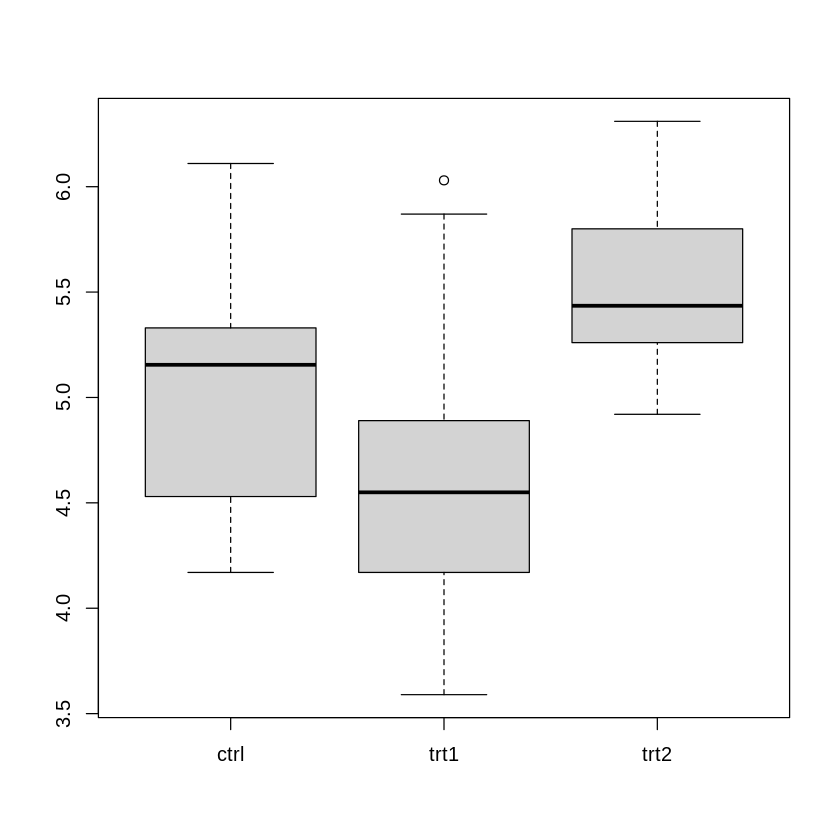

In [164]:
 attach(PlantGrowth) # PlantGrowth is from the base datasets
 boxplot(split(weight,group)) # Looks OK
 PlantGrowth.aov <- aov(weight~group)
  summary(PlantGrowth.aov)

[1] "Cult"   "Date"   "HeadWt" "VitC"

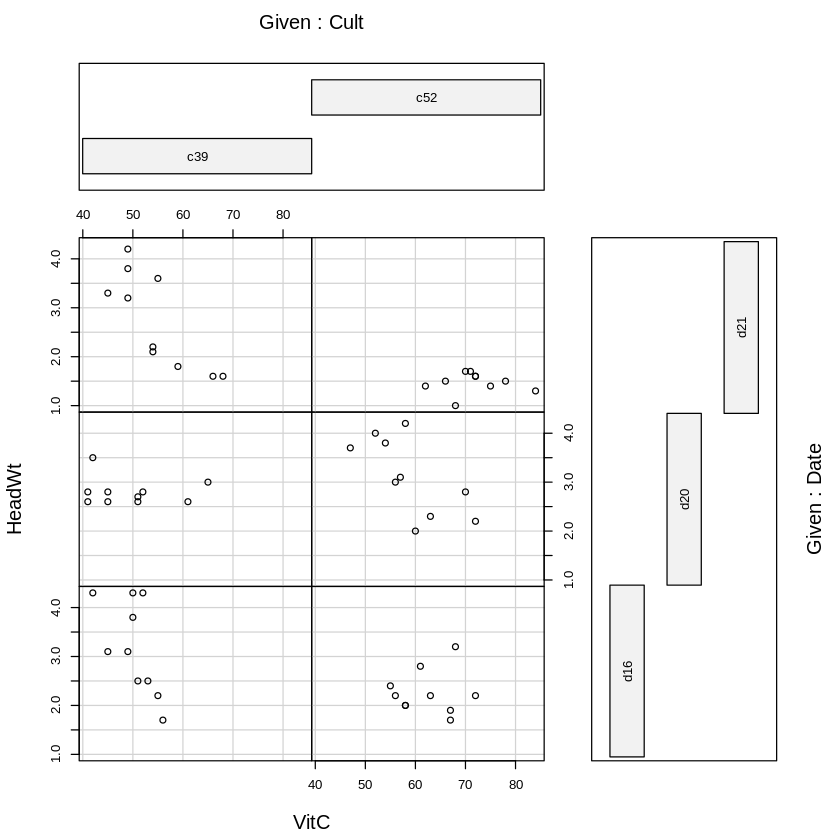

In [165]:
help(cabbages) # cabbages is from the MASS package
names(cabbages)
coplot(HeadWt~VitC|Cult+Date,data=cabbages)

In [166]:
VitC.aov<-aov(VitC~Cult+Date,data=cabbages)
 summary(VitC.aov)

            Df Sum Sq Mean Sq F value  Pr(>F)    
Cult         1   2496    2496   53.04 1.2e-09 ***
Date         2    909     455    9.66 0.00025 ***
Residuals   56   2635      47                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

***5.8.2 Shading of Kiwifruit Vines**

The data, representing yields in kilograms, are stored in a data frame named "kiwishade." These data originate from an experiment where four different treatments were applied: no shading, shading from August to December, shading from December to February, and shading from February to May. Each treatment was implemented once within each of the three blocks. The blocks were organized such that the northernmost plots were grouped together in one block due to similar exposure to sunlight shading. The remaining two blocks were grouped based on shelter effects, with one block experiencing shading from the east and the other from the west. The results are reported for each of the four vines within each plot. In terms of experimental design, the four vines within a plot are referred to as subplots.

The mean square of block:shade combination provides the error term for the analysis. It's important to note that specifying this error term ensures a correct analysis of variance breakdown. Without this specification, while the analysis can still proceed, the resulting F-statistics and p-values may be inaccurate.

In [167]:
# Read the CSV file
kiwishade <- read.csv("/content/kiwishade.csv")

# Convert 'shade' to a factor
kiwishade$shade <- factor(kiwishade$shade)

# Make sure that the level “none” (no shade) is used as reference
kiwishade$shade <- relevel(kiwishade$shade, ref="none")

# Run the ANOVA
kiwishade.aov <- aov(yield ~ block + shade + Error(block:shade), data = kiwishade)
summary(kiwishade.aov)


Warning message in aov(yield ~ block + shade + Error(block:shade), data = kiwishade):
“Error() model is singular”



Error: block:shade
          Df Sum Sq Mean Sq F value Pr(>F)   
block      2    172      86    4.12 0.0749 . 
shade      3   1395     465   22.21 0.0012 **
Residuals  6    126      21                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Error: Within
          Df Sum Sq Mean Sq F value Pr(>F)
Residuals 36    439    12.2               

In [168]:
 coef(kiwishade.aov)

(Intercept) :
(Intercept) 
      96.53 

block:shade :
 block1  block2  shade1  shade2  shade3 
 0.8123  1.8054  3.6698  6.7006 -6.6119 

Within :
numeric(0)


## **5.9 Exercises**

1. Here are two sets of data that were obtained the same apparatus, including the same rubber band, as the data
frame elasticband. For the data set elastic1, the values are:
```
 stretch (mm): 46, 54, 48, 50, 44, 42, 52
 distance (cm): 183, 217, 189, 208, 178, 150, 249.
```
For the data set elastic2, the values are:
```
 stretch (mm): 25, 45, 35, 40, 55, 50 30, 50, 60
 distance (cm): 71, 196, 127, 187, 249, 217, 114, 228, 291.
 ```
Using a different symbol and/or a different colour, plot the data from the two data frames elastic1 and
elastic2 on the same graph. Do the two sets of results appear consistent.
For each of the data sets elastic1 and elastic2, determine the regression of stretch on distance.
In each case determine

(i) fitted values and standard errors of fitted values and

(ii) the R2 statistic.

Compare the two sets of results. What is the key difference between the two sets of data?

In [169]:
# Load required library
library(ggplot2)

# Define the data for elastic1 and elastic2
elastic1 <- data.frame(stretch = c(46, 54, 48, 50, 44, 42, 52),
                        distance = c(183, 217, 189, 208, 178, 150, 249))

elastic2 <- data.frame(stretch = c(25, 45, 35, 40, 55, 50, 30, 50, 60),
                        distance = c(71, 196, 127, 187, 249, 217, 114, 228, 291))


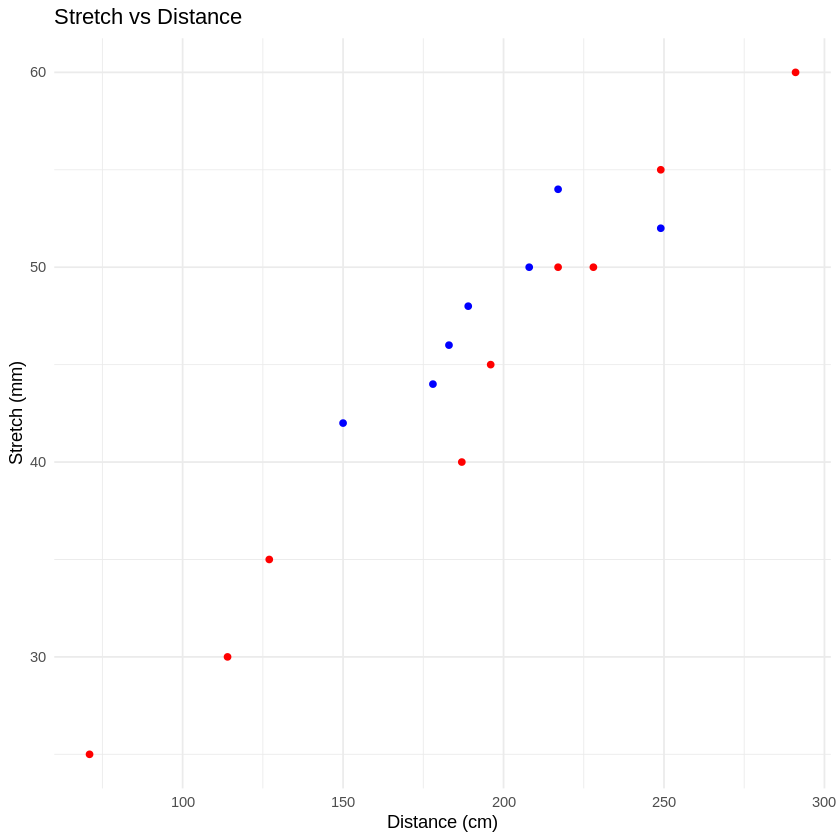

In [170]:
#Plot the Data from elastic1 and elastic2 on the Same Graph
# Plot the data from elastic1 and elastic2 on the same graph
ggplot() +
  geom_point(data = elastic1, aes(x = distance, y = stretch), color = "blue") +
  geom_point(data = elastic2, aes(x = distance, y = stretch), color = "red") +
  labs(title = "Stretch vs Distance",
       x = "Distance (cm)",
       y = "Stretch (mm)") +
  theme_minimal()


In [171]:
# Determine the Regression of Stretch on Distance for elastic1 and elastic2

# Perform linear regression for elastic1 and elastic2
elastic1_lm <- lm(stretch ~ distance, data = elastic1)
elastic2_lm <- lm(stretch ~ distance, data = elastic2)

# Summary of elastic1 regression
summary(elastic1_lm)

# Summary of elastic2 regression
summary(elastic2_lm)



Call:
lm(formula = stretch ~ distance, data = elastic1)

Residuals:
     1      2      3      4      5      6      7 
-0.384  3.481  0.886  0.575 -1.776 -0.371 -2.411 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  24.1269     5.4105    4.46   0.0066 **
distance      0.1216     0.0273    4.46   0.0066 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.12 on 5 degrees of freedom
Multiple R-squared:  0.799,	Adjusted R-squared:  0.759 
F-statistic: 19.9 on 1 and 5 DF,  p-value: 0.00663



Call:
lm(formula = stretch ~ distance, data = elastic2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.388 -0.531  0.128  1.392  1.667 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.56384    1.72814    7.27  0.00017 ***
distance     0.16484    0.00872   18.90  2.9e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.74 on 7 degrees of freedom
Multiple R-squared:  0.981,	Adjusted R-squared:  0.978 
F-statistic:  357 on 1 and 7 DF,  p-value: 2.89e-07


In [172]:
#Compare the Results of Regression
# Compare the results of regression
cat("Summary of elastic1 regression:\n")
print(summary(elastic1_lm))

cat("\nSummary of elastic2 regression:\n")
print(summary(elastic2_lm))


Summary of elastic1 regression:

Call:
lm(formula = stretch ~ distance, data = elastic1)

Residuals:
     1      2      3      4      5      6      7 
-0.384  3.481  0.886  0.575 -1.776 -0.371 -2.411 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)  24.1269     5.4105    4.46   0.0066 **
distance      0.1216     0.0273    4.46   0.0066 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.12 on 5 degrees of freedom
Multiple R-squared:  0.799,	Adjusted R-squared:  0.759 
F-statistic: 19.9 on 1 and 5 DF,  p-value: 0.00663


Summary of elastic2 regression:

Call:
lm(formula = stretch ~ distance, data = elastic2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.388 -0.531  0.128  1.392  1.667 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.56384    1.72814    7.27  0.00017 ***
distance     0.16484    0.00872   18.90  2.9e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.

Based on the summaries of the regressions, compare the fitted values, standard errors of fitted values, and
$𝑅^2$statistics between elastic1 and elastic2. Identify the key difference between the two sets of data.

2. Using the data frame woods (in the data sets accompanying these notes), carry out a regression of strength on
SpecificGravity and Moisture. Carefully examine the regression diagnostic plot, obtained by supplying
the name of the lm object as the first parameter to plot(). What does this indicate?

In [173]:
woods <- read.csv("/content/woods.csv")
woods
#Explore the Structure of the Data
# View the structure of the woods data
str(woods)


common_species_name,genus,species,scientific_name,classification,moisture,Specific_gravity,modulus_of_rupture,modulus_of_elasticity,work_to_maximum_load,impact_bending,compression_parallel_to_grain,compression_perpendicular_to_grain,shear_parallel_to_grain,tension_perpendicular_to_grain,strength
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
"Alder, Red",Alnus,rubra,Alnus rubra,Hardwood,Green,0.37,6500,1.17,8.0,22,2960,250,770,390,440
"Alder, Red",Alnus,rubra,Alnus rubra,Hardwood,12%,0.41,9800,1.38,8.4,20,5820,440,1080,420,590
"Ash, Black",Fraxinus,nigra,Fraxinus nigra,Hardwood,Green,0.45,6000,1.04,12.1,33,2300,350,860,490,520
"Ash, Black",Fraxinus,nigra,Fraxinus nigra,Hardwood,12%,0.49,12600,1.60,14.9,35,5970,760,1570,700,850
"Ash, Blue",Fraxinus,quadrangulata,Fraxinus quadrangulata,Hardwood,Green,0.53,9600,1.24,14.7,NA,4180,810,1540,NA,NA
"Ash, Blue",Fraxinus,quadrangulata,Fraxinus quadrangulata,Hardwood,12%,0.58,13800,1.40,14.4,NA,6980,1420,2030,NA,NA
"Ash, Green",Fraxinus,pennsylvanica,Fraxinus pennsylvanica,Hardwood,Green,0.53,9500,1.40,11.8,35,4200,730,1260,590,870
"Ash, Green",Fraxinus,pennsylvanica,Fraxinus pennsylvanica,Hardwood,12%,0.56,14100,1.66,13.4,32,7080,1310,1910,700,1200
"Ash, Oregon",Fraxinus,latifolia,Fraxinus latifolia,Hardwood,Green,0.50,7600,1.13,12.2,39,3510,530,1190,590,790


'data.frame':	226 obs. of  16 variables:
 $ common_species_name               : chr  "Alder, Red" "Alder, Red" "Ash, Black" "Ash, Black" ...
 $ genus                             : chr  "Alnus" "Alnus" "Fraxinus" "Fraxinus" ...
 $ species                           : chr  "rubra" "rubra" "nigra" "nigra" ...
 $ scientific_name                   : chr  "Alnus rubra" "Alnus rubra" "Fraxinus nigra" "Fraxinus nigra" ...
 $ classification                    : chr  "Hardwood" "Hardwood" "Hardwood" "Hardwood" ...
 $ moisture                          : chr  "Green" "12%" "Green" "12%" ...
 $ Specific_gravity                  : num  0.37 0.41 0.45 0.49 0.53 0.58 0.53 0.56 0.5 0.55 ...
 $ modulus_of_rupture                : int  6500 9800 6000 12600 9600 13800 9500 14100 7600 12700 ...
 $ modulus_of_elasticity             : num  1.17 1.38 1.04 1.6 1.24 1.4 1.4 1.66 1.13 1.36 ...
 $ work_to_maximum_load              : num  8 8.4 12.1 14.9 14.7 14.4 11.8 13.4 12.2 14.4 ...
 $ impact_bending          

In [174]:
#Perform Regression of Strength on SpecificGravity and Moisture
#Now, carry out a regression of "strength" on "SpecificGravity" and "Moisture" using the lm() function.

# Perform regression of strength on SpecificGravity and Moisture
woods_lm <- lm(strength ~ Specific_gravity + moisture, data = woods)

#Examine the Summary Statistics of the Regression
summary(woods_lm)



Call:
lm(formula = strength ~ Specific_gravity + moisture, data = woods)

Residuals:
   Min     1Q Median     3Q    Max 
-368.6  -67.1   -4.9   71.2  462.7 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -949.15      42.53  -22.32   <2e-16 ***
Specific_gravity  3528.61      85.86   41.10   <2e-16 ***
moisture1           31.26       9.42    3.32   0.0011 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 129 on 193 degrees of freedom
  (30 observations deleted due to missingness)
Multiple R-squared:  0.904,	Adjusted R-squared:  0.903 
F-statistic:  909 on 2 and 193 DF,  p-value: <2e-16


Interpret the coefficients, standard errors, t-values, and p-values to understand the relationship between the dependent variable (strength) and the independent variables (SpecificGravity and Moisture).

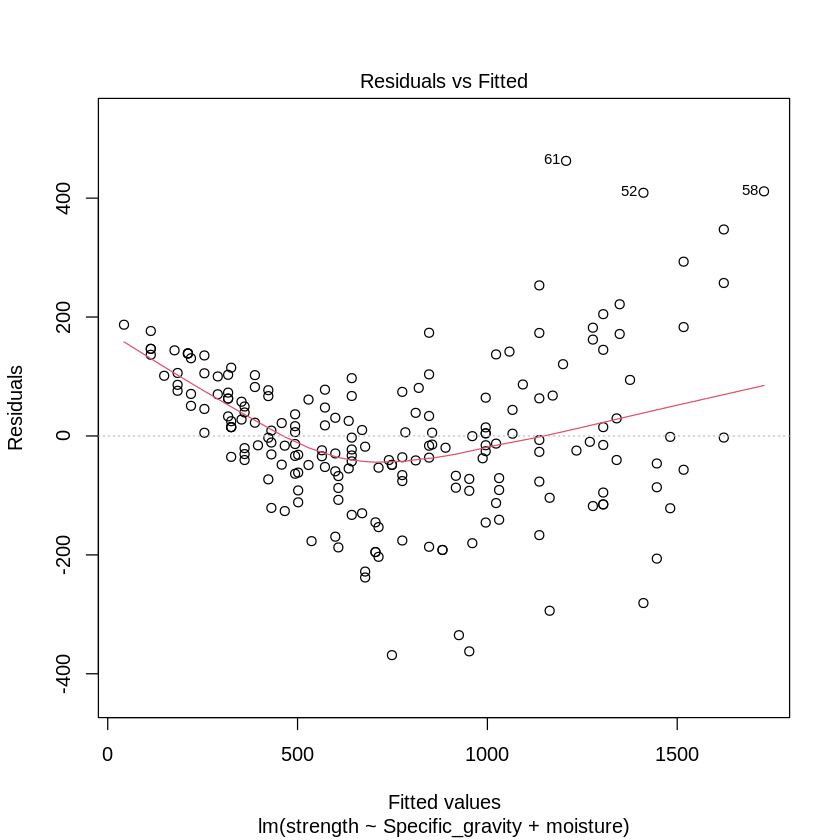

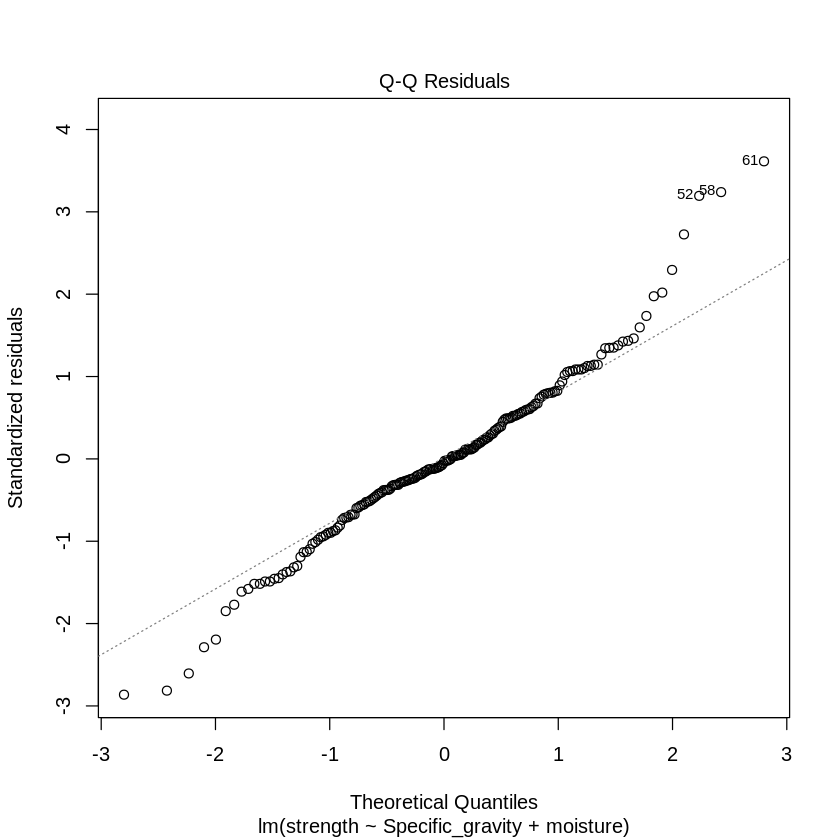

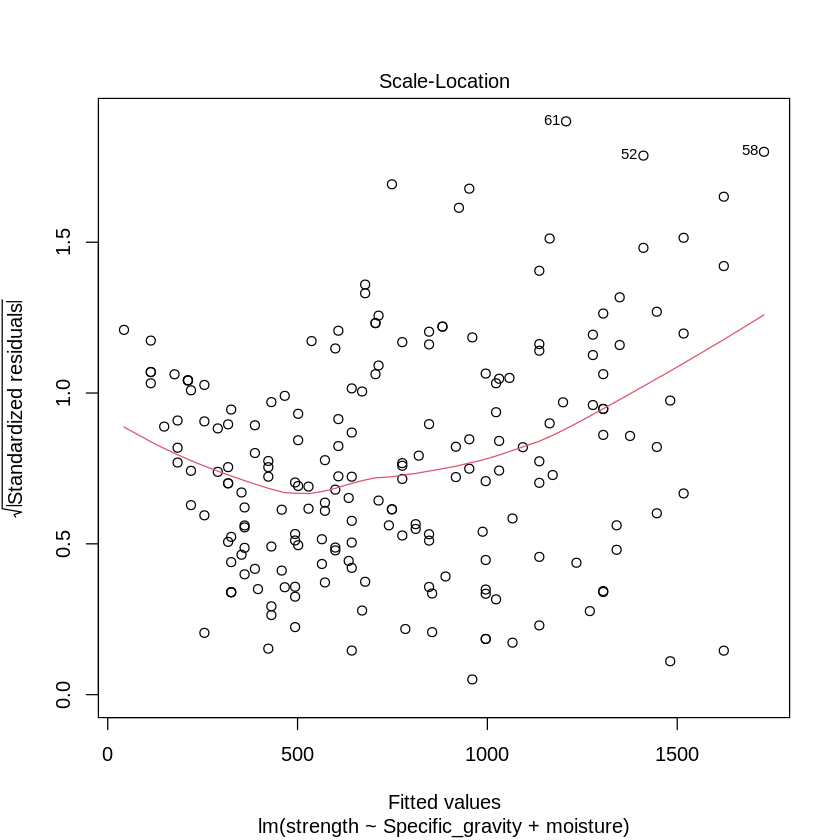

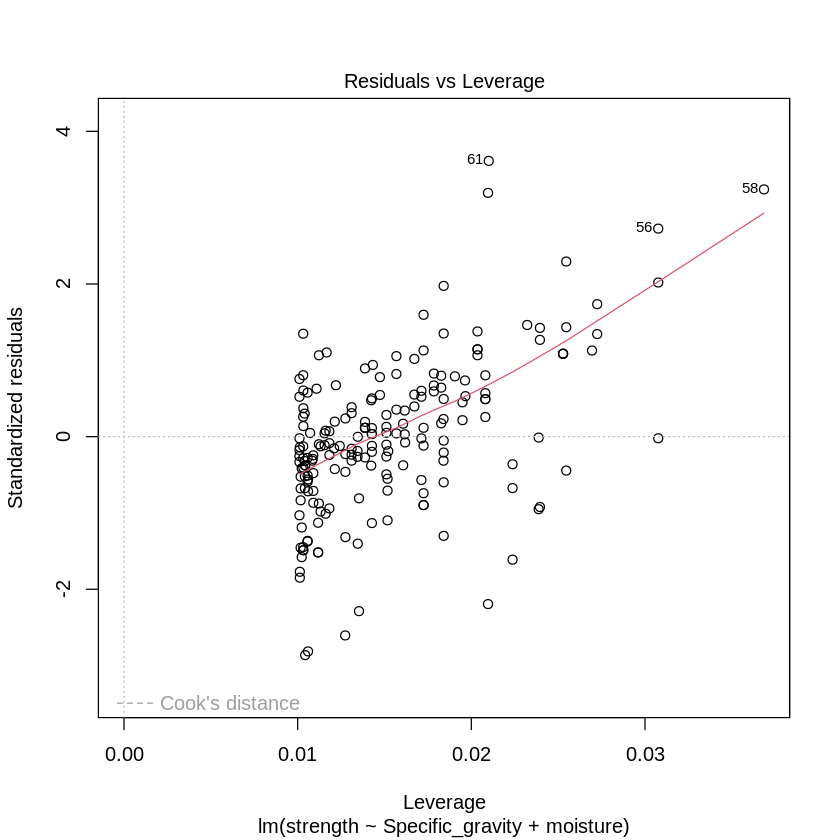

In [175]:
# Plot regression diagnostic plots
plot(woods_lm)


# **Based on the results of the regression analysis:**

### Residuals:
- The residuals (differences between observed and predicted values) range from -368.6 to 462.7.
- The interquartile range (IQR), which represents the middle 50% of the data, is from -67.1 to 71.2.

### Coefficients:
- **Intercept**: The intercept is estimated to be -949.15. It represents the predicted value of strength when Specific_gravity and moisture are both zero.
- **Specific_gravity**: For every unit increase in Specific_gravity, the strength is expected to increase by an estimated 3528.61 units.
- **moisture1**: This coefficient represents the effect of moisture1 (a categorical variable) on strength compared to its reference level. A unit change in moisture1 results in a 31.26-unit change in strength on average.

### Significance:
- All coefficients are statistically significant at the 0.05 significance level.
- The p-values for all coefficients are less than 0.001, indicating strong evidence against the null hypothesis that the coefficients are equal to zero.

### Model Fit:
- The adjusted R-squared value, which adjusts for the number of predictors in the model, is 0.903. This indicates that approximately 90.3% of the variability in strength can be explained by the independent variables in the model.
- The F-statistic tests the overall significance of the model. With a p-value less than 0.001, the model is considered statistically significant.

### Residual Standard Error:
- The residual standard error (RSE) is 129, indicating the average amount that the observed values deviate from the predicted values.
- 30 observations were deleted due to missingness, which could impact the accuracy of the model.

In summary, the regression analysis suggests that both Specific_gravity and moisture1 have significant effects on strength. The model explains a high proportion of the variability in strength, and the coefficients are all statistically significant. However, the presence of missing data and the potential influence of outliers should be considered when interpreting the results.

3. Using the data frame cars (in the datasets package), plot distance (i.e. stopping distance) versus speed. Fit
a line to this relationship, and plot the line. Then try fitting and plotting a quadratic curve. Does the quadratic
curve give a useful improvement to the fit? If you have studied the dynamics of particles, can you find a theory
that would tell you how stopping distance might change with speed?5. Using the data frame hills (in package
MASS), regress time on distance and climb. What can you learn from the diagnostic plots that you get
when you plot the lm object? Try also regressing log(time) on log(distance) and log(climb). Which
of these regression equations would you prefer?

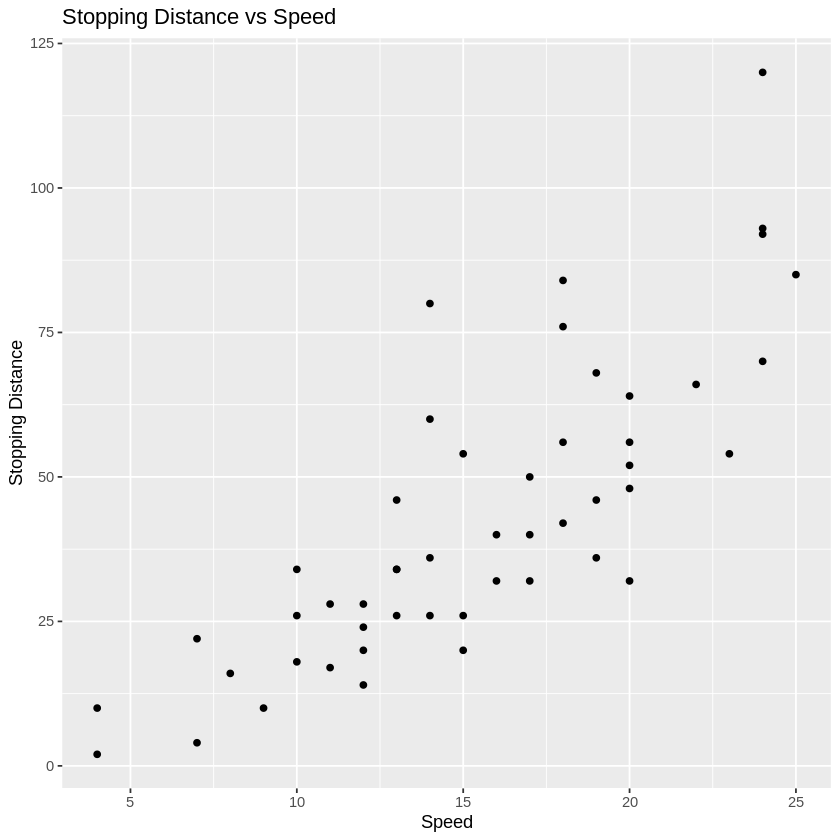

In [176]:
data(cars)

# Step 3: Plot Distance vs Speed
ggplot(cars, aes(x = speed, y = dist)) +
  geom_point() +
  labs(x = "Speed", y = "Stopping Distance") +
  ggtitle("Stopping Distance vs Speed")

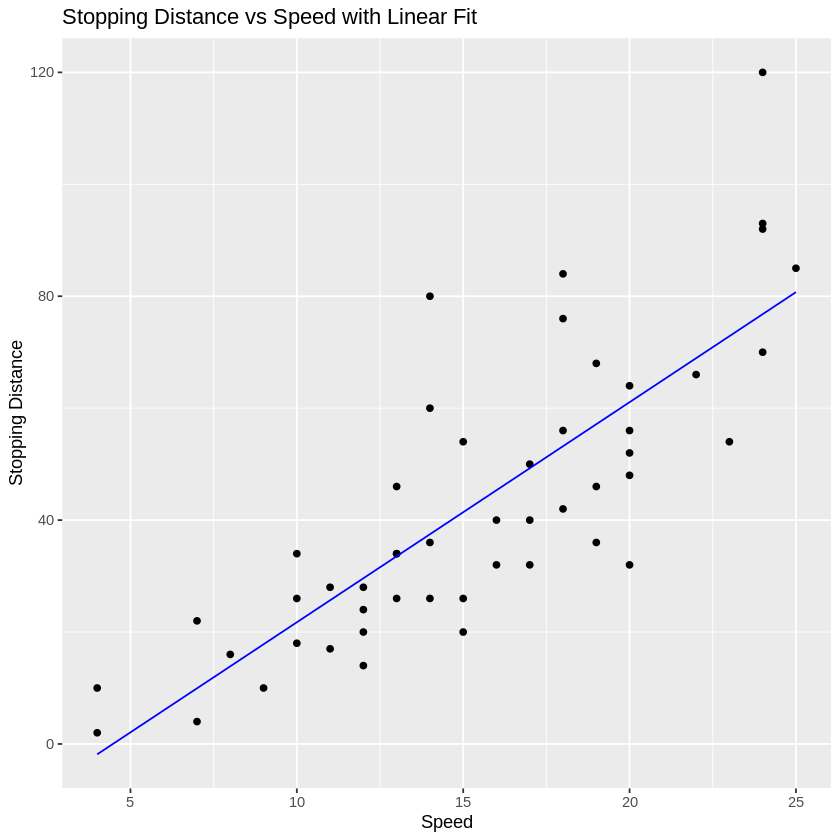

In [177]:
# Step 4: Fit a Line to the Relationship
linear_model <- lm(dist ~ speed, data = cars)
linear_fit <- predict(linear_model)
ggplot(cars, aes(x = speed, y = dist)) +
  geom_point() +
  geom_line(aes(y = linear_fit), color = "blue") +
  labs(x = "Speed", y = "Stopping Distance") +
  ggtitle("Stopping Distance vs Speed with Linear Fit")



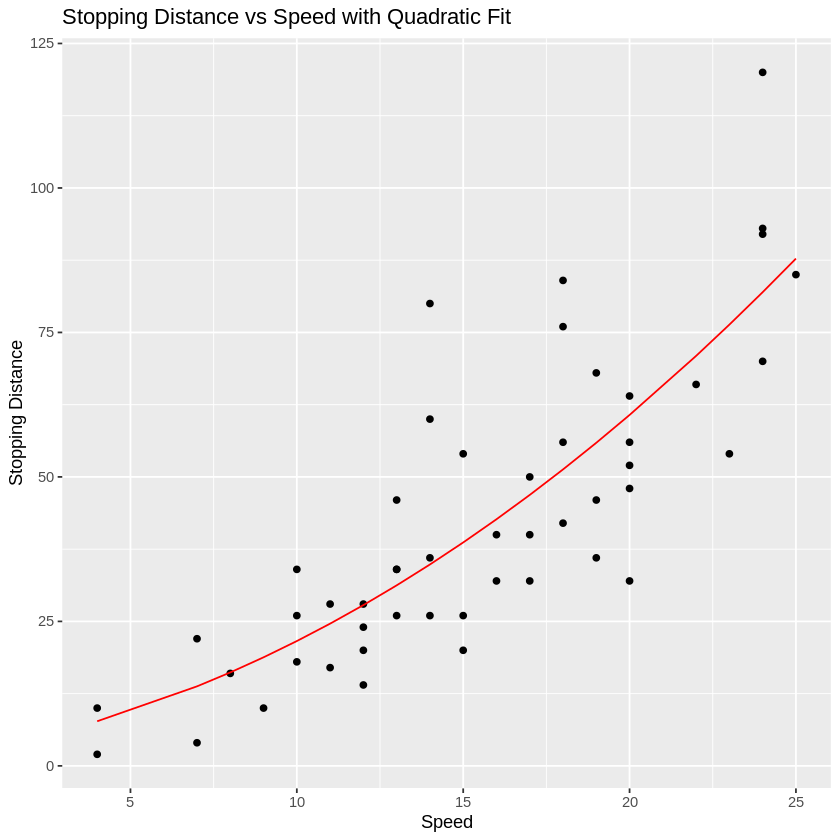

In [178]:

# Step 5: Plot a Quadratic Curve
quadratic_model <- lm(dist ~ speed + I(speed^2), data = cars)
quadratic_fit <- predict(quadratic_model)
ggplot(cars, aes(x = speed, y = dist)) +
  geom_point() +
  geom_line(aes(y = quadratic_fit), color = "red") +
  labs(x = "Speed", y = "Stopping Distance") +
  ggtitle("Stopping Distance vs Speed with Quadratic Fit")

In [179]:
load("/content/hills.RData") # Load the data

# Step 7: Regress Time on Distance and Climb
linear_regression <- lm(time ~ distance + climb, data = hills)


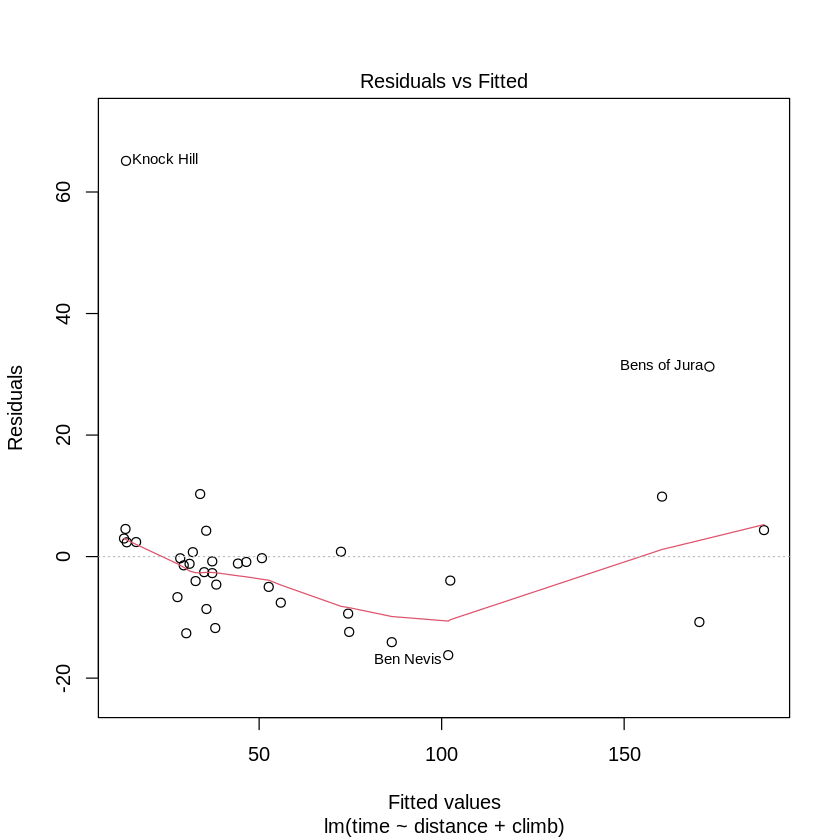

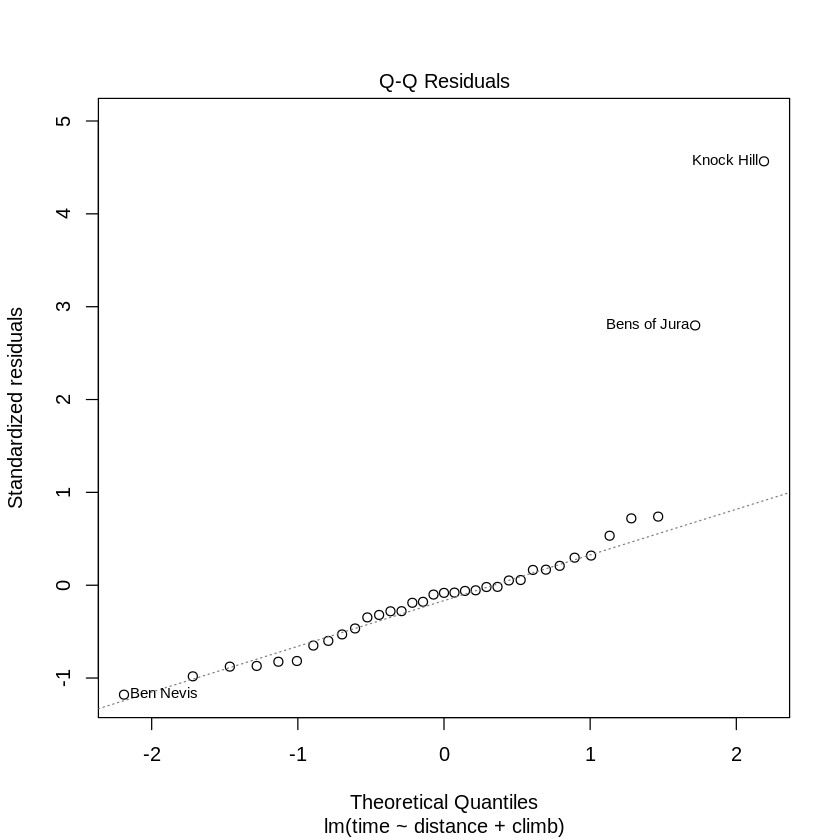

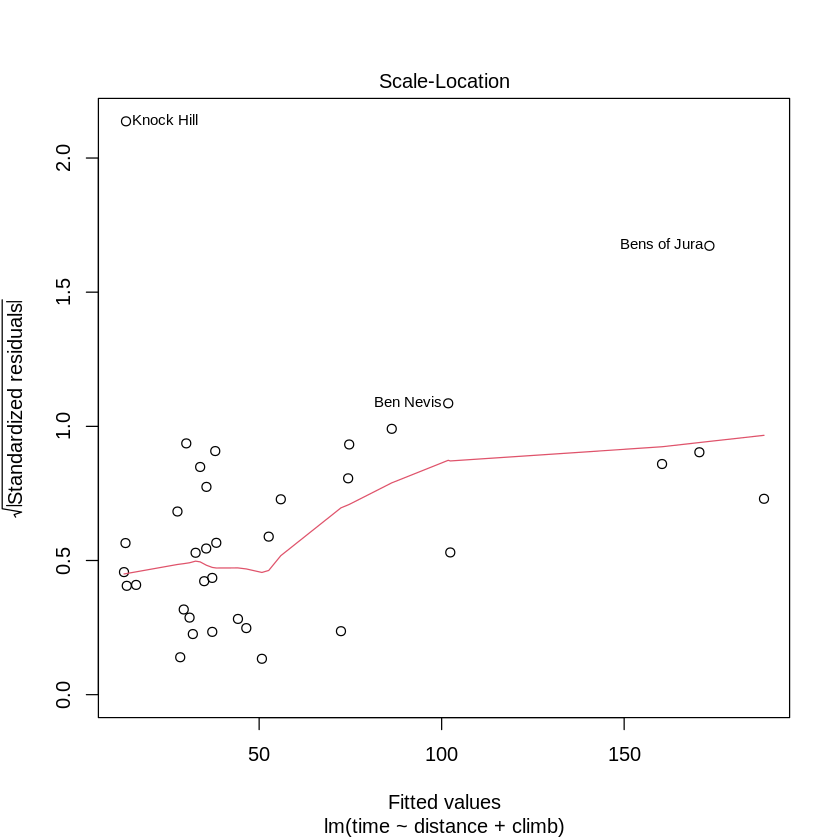

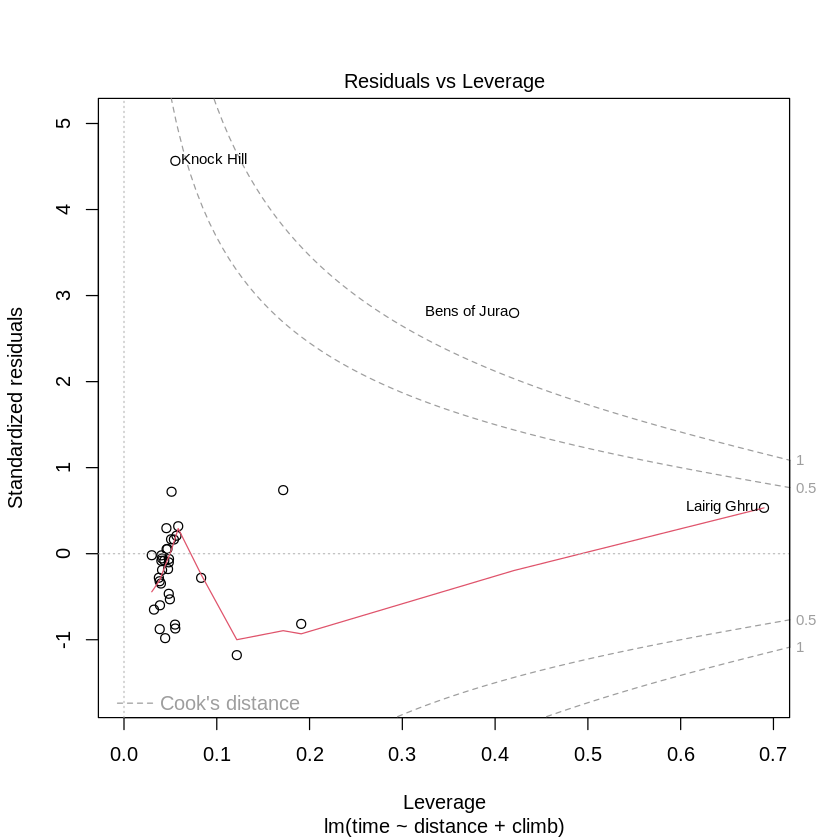

In [180]:
# Step 8: Diagnostic plots
par(mfrow = c(1, 1)) # Set up the layout for diagnostic plots
plot(linear_regression)

# Step 9: Try Logarithmic Transformation
log_regression <- lm(log(time) ~ log(distance) + log(climb), data = hills)



In [181]:
# Step 10: Compare regression equations
summary(linear_regression)
summary(log_regression)


Call:
lm(formula = time ~ distance + climb, data = hills)

Residuals:
   Min     1Q Median     3Q    Max 
-16.22  -7.13  -1.19   2.37  65.12 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.99204    4.30273   -2.09    0.045 *  
distance     6.21796    0.60115   10.34  9.9e-12 ***
climb        0.01105    0.00205    5.39  6.4e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14.7 on 32 degrees of freedom
Multiple R-squared:  0.919,	Adjusted R-squared:  0.914 
F-statistic:  182 on 2 and 32 DF,  p-value: <2e-16



Call:
lm(formula = log(time) ~ log(distance) + log(climb), data = hills)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5929 -0.1125 -0.0508  0.0444  1.4581 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.9192     0.5352    1.72    0.096 .  
log(distance)   0.8975     0.1280    7.01    6e-08 ***
log(climb)      0.1710     0.0933    1.83    0.076 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.315 on 32 degrees of freedom
Multiple R-squared:  0.812,	Adjusted R-squared:   0.8 
F-statistic: 69.1 on 2 and 32 DF,  p-value: 2.42e-12


To determine which regression line is best, we can compare the adjusted R-squared values and the residual standard errors of the two models.

For the linear regression model:
- Adjusted R-squared: 0.914
- Residual standard error: 14.7

For the logarithmic regression model:
- Adjusted R-squared: 0.8
- Residual standard error: 0.315

Based on these metrics:
- The linear regression model has a higher adjusted R-squared value, indicating that it explains more variability in the data.
- The logarithmic regression model has a much lower residual standard error, indicating that it has smaller errors in prediction.

Since adjusted R-squared is a measure of the proportion of variance in the dependent variable that is explained by the independent variables, and residual standard error measures the average deviation of the observed values from the fitted values, there's a trade-off between them.

In this case, the linear regression model seems to provide a better overall fit, as it explains more variability in the data. However, the logarithmic regression model has smaller prediction errors. Depending on the specific goals and requirements of the analysis, one may prefer one model over the other.

In [183]:
# Check the number of observations in each data frame
nrow_elastic1 <- nrow(elastic1)
nrow_elastic2 <- nrow(elastic2)

# Ensure both data frames have the same number of observations
if (nrow_elastic1 != nrow_elastic2) {
  stop("The number of observations in elastic1 and elastic2 are different.")
}

# Fit linear regression models using sum contrasts
model_sum_contrasts_elastic1 <- lm(distance ~ stretch, data = elastic1)
model_sum_contrasts_elastic2 <- lm(distance ~ stretch, data = elastic2)

# Set Helmert contrasts for both data frames
contrasts(elastic1$stretch) <- contr.helmert(length(levels(elastic1$stretch)))
contrasts(elastic2$stretch) <- contr.helmert(length(levels(elastic2$stretch)))

# Fit linear regression models using Helmert contrasts
model_helmert_contrasts_elastic1 <- lm(distance ~ stretch, data = elastic1)
model_helmert_contrasts_elastic2 <- lm(distance ~ stretch, data = elastic2)

# Compare models
anova(model_sum_contrasts_elastic1, model_sum_contrasts_elastic2)
anova(model_helmert_contrasts_elastic1, model_helmert_contrasts_elastic2)


ERROR: Error in eval(expr, envir, enclos): The number of observations in elastic1 and elastic2 are different.


6. Type
```
hosp<-rep(c(”RNC”,”Hunter”,”Mater”),2)
hosp
fhosp<-factor(hosp)
levels(fhosp)
```
Now repeat the steps involved in forming the factor fhosp, this time keeping the factor levels in the order RNC,
Hunter, Mater.
Use contrasts(fhosp) to form and print out the matrix of contrasts. Do this using helmert contrasts,
treatment contrasts, and sum contrasts. Using an outcome variable
```
y <- c(2,5,8,10,3,9)
```
fit the model lm(y~fhosp), repeating the fit for each of the three different choices of contrasts. Comment on
what you get.
For which choice(s) of contrasts do the parameter estimates change when you re-order the factor levels?

In [184]:
# Original factor creation
hosp <- rep(c("RNC", "Hunter", "Mater"), 2)
fhosp <- factor(hosp)
levels(fhosp)

# Forming the factor fhosp with levels in the order RNC, Hunter, Mater
fhosp_reordered <- factor(hosp, levels = c("RNC", "Hunter", "Mater"))
levels(fhosp_reordered)

# Contrasts using Helmert contrasts
contrasts(fhosp_reordered) <- contr.helmert(3)
print(contrasts(fhosp_reordered))

# Contrasts using Treatment contrasts
contrasts(fhosp_reordered) <- contr.treatment(3)
print(contrasts(fhosp_reordered))

# Contrasts using Sum contrasts
contrasts(fhosp_reordered) <- contr.sum(3)
print(contrasts(fhosp_reordered))

# Outcome variable
y <- c(2, 5, 8, 10, 3, 9)

# Fit the model using original factor fhosp
fit_original <- lm(y ~ fhosp)

# Fit the model using reordered factor fhosp and different contrasts
fit_helmert <- lm(y ~ fhosp_reordered)
fit_treatment <- lm(y ~ fhosp_reordered)
fit_sum <- lm(y ~ fhosp_reordered)

# Compare parameter estimates
summary(fit_original)
summary(fit_helmert)
summary(fit_treatment)
summary(fit_sum)


[1] "Hunter" "Mater"  "RNC"

[1] "RNC"    "Hunter" "Mater"

       [,1] [,2]
RNC      -1   -1
Hunter    1   -1
Mater     0    2
       2 3
RNC    0 0
Hunter 1 0
Mater  0 1
       [,1] [,2]
RNC       1    0
Hunter    0    1
Mater    -1   -1



Call:
lm(formula = y ~ fhosp)

Residuals:
   1    2    3    4    5    6 
-4.0  1.0 -0.5  4.0 -1.0  0.5 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)     6.17       1.38    4.45    0.021 *
fhosp1         -2.17       1.96   -1.11    0.349  
fhosp2          2.33       1.96    1.19    0.319  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.39 on 3 degrees of freedom
Multiple R-squared:  0.371,	Adjusted R-squared:  -0.0486 
F-statistic: 0.884 on 2 and 3 DF,  p-value: 0.499



Call:
lm(formula = y ~ fhosp_reordered)

Residuals:
   1    2    3    4    5    6 
-4.0  1.0 -0.5  4.0 -1.0  0.5 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)         6.167      1.384    4.45    0.021 *
fhosp_reordered1   -0.167      1.958   -0.09    0.938  
fhosp_reordered2   -2.167      1.958   -1.11    0.349  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.39 on 3 degrees of freedom
Multiple R-squared:  0.371,	Adjusted R-squared:  -0.0486 
F-statistic: 0.884 on 2 and 3 DF,  p-value: 0.499



Call:
lm(formula = y ~ fhosp_reordered)

Residuals:
   1    2    3    4    5    6 
-4.0  1.0 -0.5  4.0 -1.0  0.5 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)         6.167      1.384    4.45    0.021 *
fhosp_reordered1   -0.167      1.958   -0.09    0.938  
fhosp_reordered2   -2.167      1.958   -1.11    0.349  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.39 on 3 degrees of freedom
Multiple R-squared:  0.371,	Adjusted R-squared:  -0.0486 
F-statistic: 0.884 on 2 and 3 DF,  p-value: 0.499



Call:
lm(formula = y ~ fhosp_reordered)

Residuals:
   1    2    3    4    5    6 
-4.0  1.0 -0.5  4.0 -1.0  0.5 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)         6.167      1.384    4.45    0.021 *
fhosp_reordered1   -0.167      1.958   -0.09    0.938  
fhosp_reordered2   -2.167      1.958   -1.11    0.349  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.39 on 3 degrees of freedom
Multiple R-squared:  0.371,	Adjusted R-squared:  -0.0486 
F-statistic: 0.884 on 2 and 3 DF,  p-value: 0.499


7. In the data set cement (MASS package), examine the dependence of y (amount of heat produced) on x1, x2, x3
and x4 (which are proportions of four constituents). Begin by examining the scatterplot matrix. As the
explanatory variables are proportions, do they require transformation, perhaps by taking log(x/(100-x))? What
alternative strategies one might use to find an effective prediction equation?


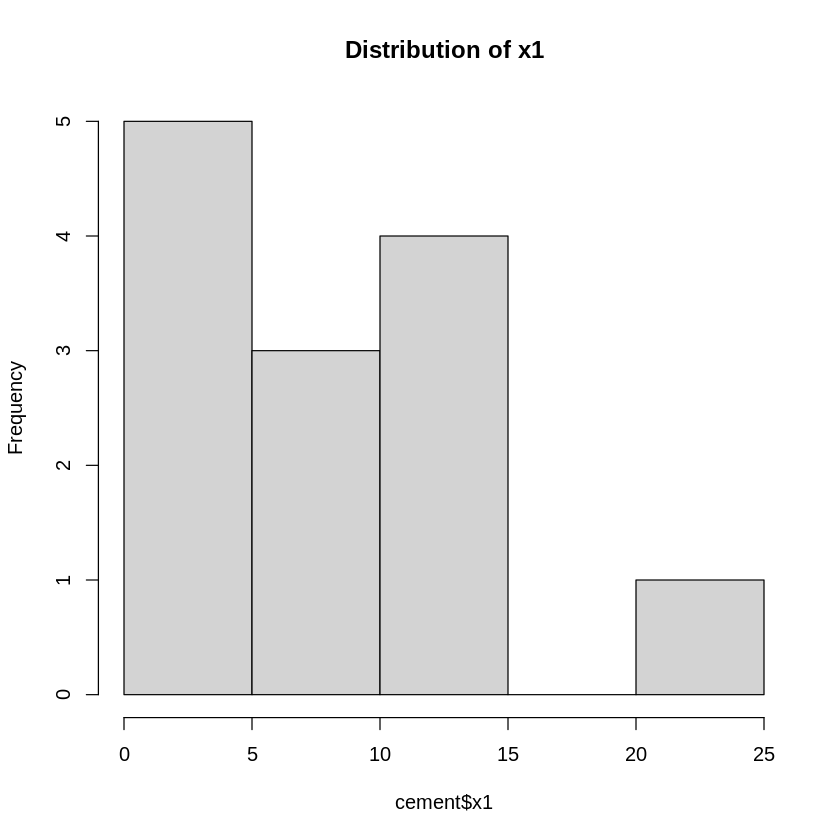

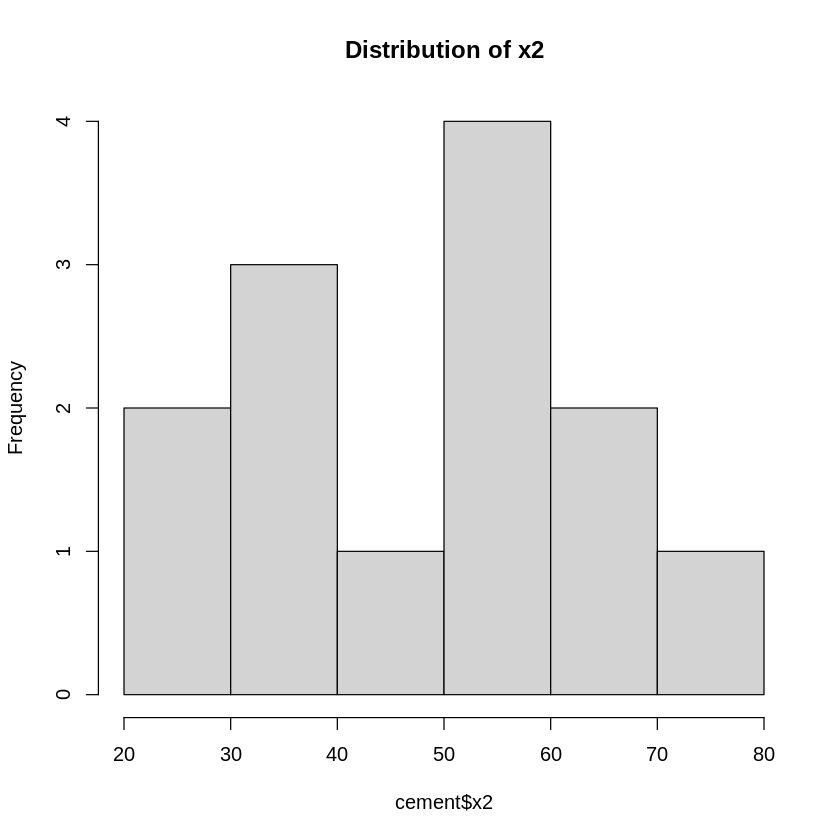

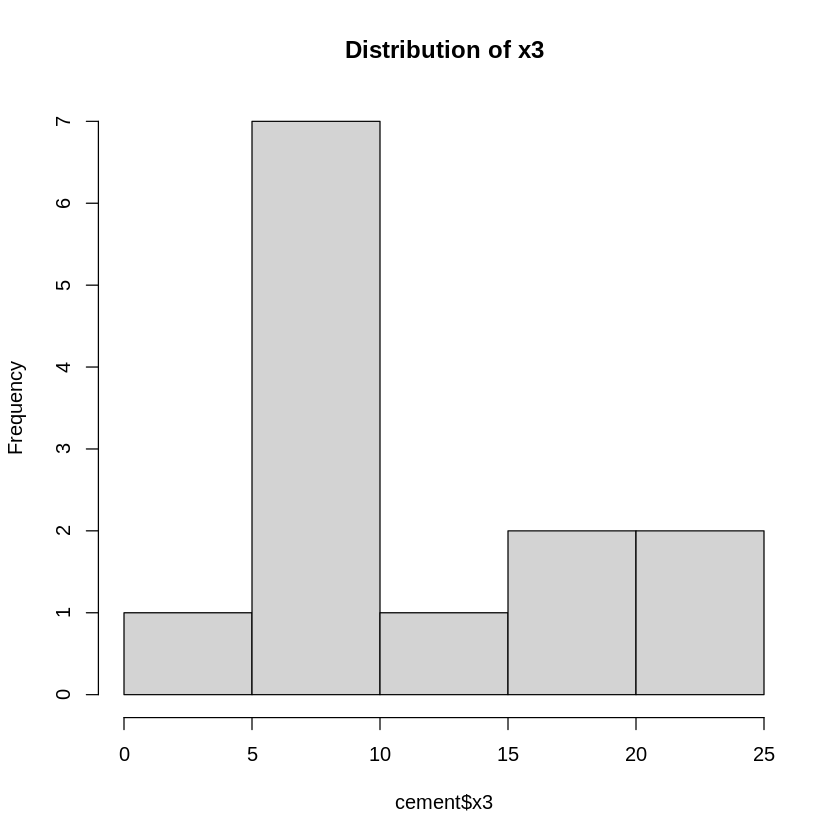


Call:
lm(formula = y ~ log_x1 + log_x2 + log_x3 + log_x4, data = cement)

Residuals:
   Min     1Q Median     3Q    Max 
 -5.45  -2.75  -1.49   2.40   8.40 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  110.212     35.270    3.12    0.014 *
log_x1         7.083      4.300    1.65    0.138  
log_x2         7.185     11.250    0.64    0.541  
log_x3        -0.627      8.077   -0.08    0.940  
log_x4        -5.296      8.651   -0.61    0.557  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.11 on 8 degrees of freedom
Multiple R-squared:  0.923,	Adjusted R-squared:  0.884 
F-statistic:   24 on 4 and 8 DF,  p-value: 0.000165


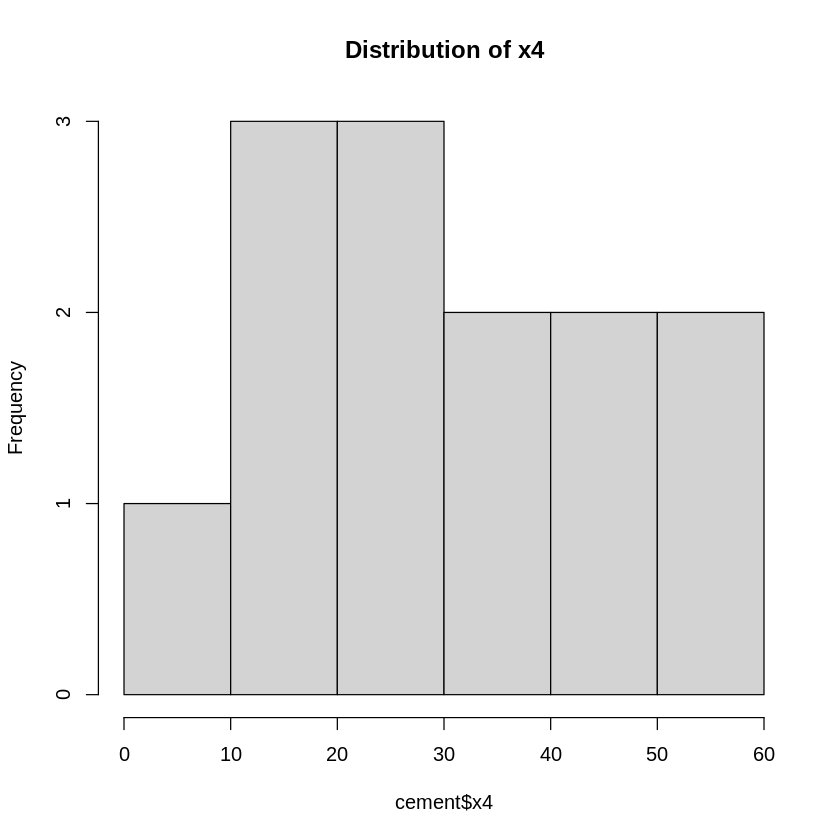

In [185]:
cement <- read.csv("/content/cement.csv")

# Step 2: Examine the distribution of each predictor variable
hist(cement$x1, main = "Distribution of x1")
hist(cement$x2, main = "Distribution of x2")
hist(cement$x3, main = "Distribution of x3")
hist(cement$x4, main = "Distribution of x4")

# Step 3: Check if the explanatory variables require transformation
# You can use the logit transformation to transform proportions
cement$log_x1 <- log(cement$x1 / (100 - cement$x1))
cement$log_x2 <- log(cement$x2 / (100 - cement$x2))
cement$log_x3 <- log(cement$x3 / (100 - cement$x3))
cement$log_x4 <- log(cement$x4 / (100 - cement$x4))

# Step 4: Alternative strategies for finding an effective prediction equation
# - You can use various regression techniques such as linear regression, ridge regression, or lasso regression.
# - You can try different variable transformations or interactions to improve model fit.
# - You can use cross-validation or other model evaluation techniques to assess model performance.

# For example, fitting a linear regression model with the transformed variables
lm_model <- lm(y ~ log_x1 + log_x2 + log_x3 + log_x4, data = cement)
summary(lm_model)


This code loads the cement dataset, examines the scatterplot matrix, checks the distribution of each predictor variable, applies the logit transformation to the proportions, and fits a linear regression model to predict the amount of heat produced (y) based on the transformed predictor variables
$(log_x1, log_x2, log_x3, log_x4)$.

Finally, it provides a summary of the linear regression model.

8. In the data set pressure (datasets package), examine the dependence of pressure on temperature.
[Transformation of temperature makes sense only if one first converts to degrees Kelvin. Consider
transformation of pressure. A logarithmic transformation is too extreme; the direction of the curvature changes.
What family of transformations might one try?
Modify the code in section 5.5.3 to fit: (a) a line, with accompanying 95% confidence bounds, and (b) a cubic
curve, with accompanying 95% pointwise confidence bounds. Which of the three possibilities (line, quadratic,
curve) is most plausible? Can any of them be trusted?


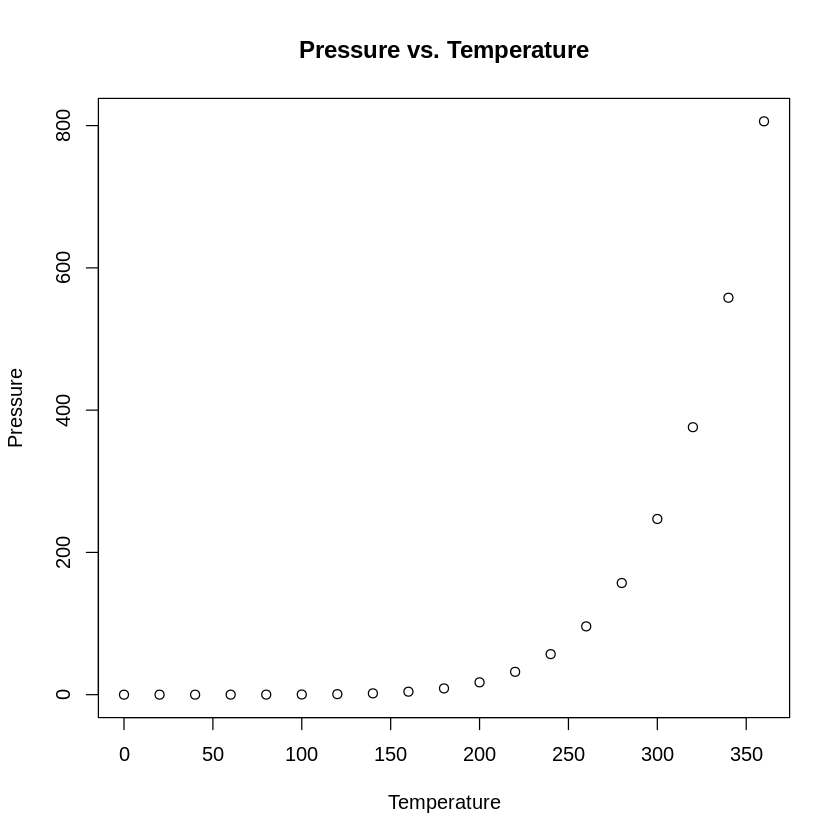


Call:
lm(formula = pressure$pressure ~ temperature_kelvin)

Residuals:
   Min     1Q Median     3Q    Max 
-158.1 -117.1  -32.8   72.3  409.4 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -561.016    147.248   -3.81  0.00140 ** 
temperature_kelvin    1.512      0.316    4.79  0.00017 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 151 on 17 degrees of freedom
Multiple R-squared:  0.574,	Adjusted R-squared:  0.549 
F-statistic: 22.9 on 1 and 17 DF,  p-value: 0.000171


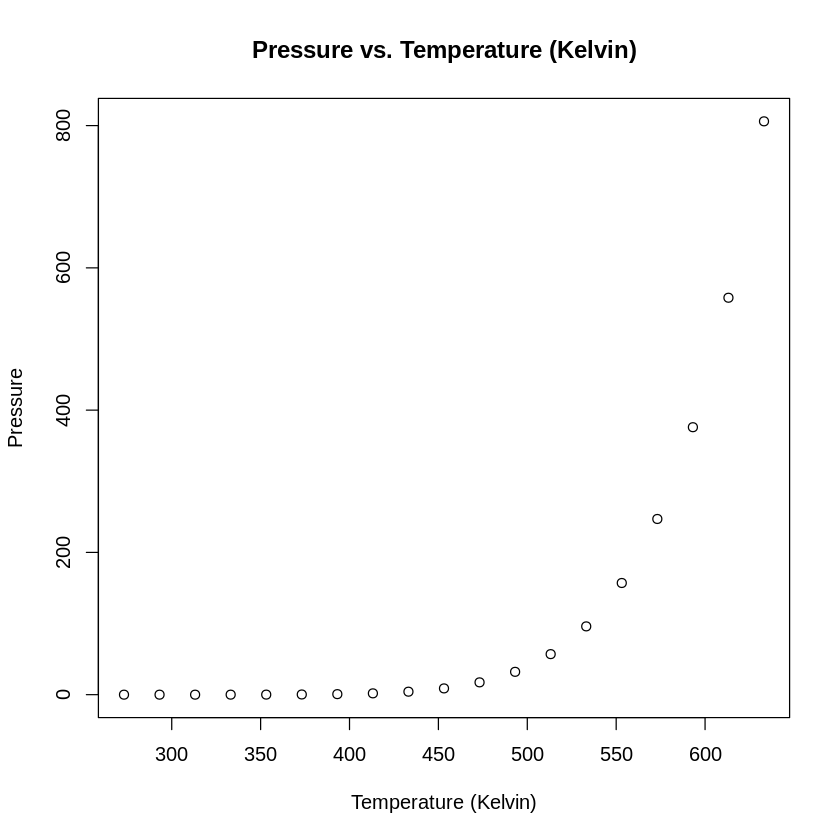

,2.5 %,97.5 %
(Intercept),-871.683,-250.350
temperature_kelvin,0.846,2.179



Call:
lm(formula = pressure$pressure ~ poly(temperature_kelvin, 3))

Residuals:
   Min     1Q Median     3Q    Max 
-32.85 -20.44  -2.49  19.44  46.37 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    124.34       5.88    21.2  1.4e-12 ***
poly(temperature_kelvin, 3)1   722.17      25.61    28.2  2.1e-14 ***
poly(temperature_kelvin, 3)2   545.95      25.61    21.3  1.3e-12 ***
poly(temperature_kelvin, 3)3   280.65      25.61    11.0  1.5e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 25.6 on 15 degrees of freedom
Multiple R-squared:  0.989,	Adjusted R-squared:  0.987 
F-statistic:  456 on 3 and 15 DF,  p-value: 5.89e-15


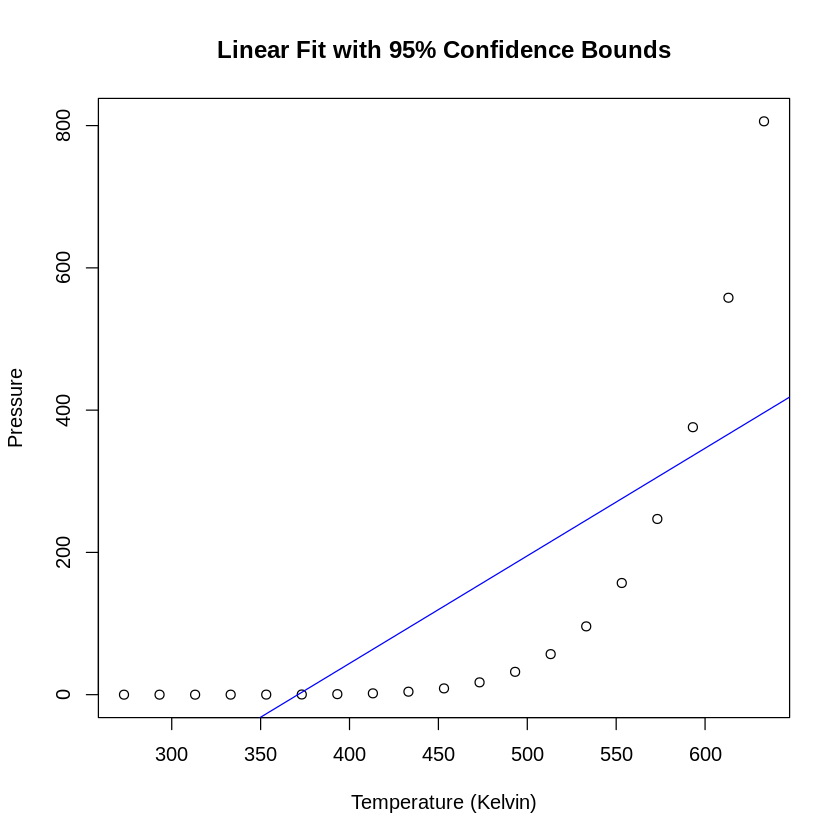

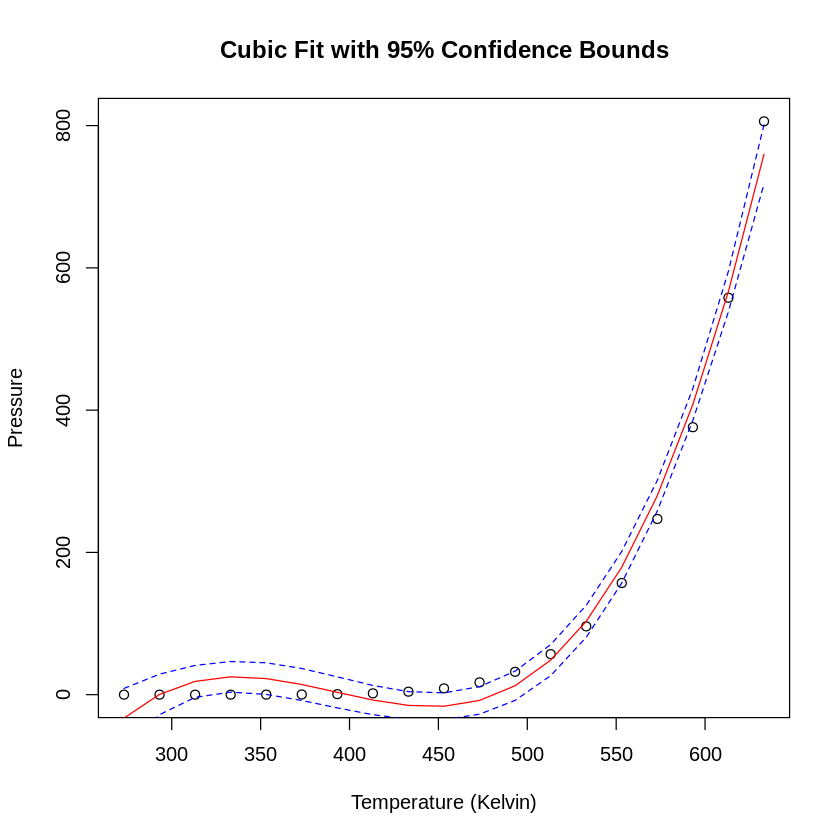

In [186]:
# Load the pressure data
pressure <- read.csv("/content/pressure.csv")

# Step 1: Examine the dependence of pressure on temperature
plot(pressure$temperature, pressure$pressure, main = "Pressure vs. Temperature", xlab = "Temperature", ylab = "Pressure")

# Step 2: Convert temperature to degrees Kelvin
temperature_kelvin <- pressure$temperature + 273.15

# Step 3: Examine the dependence of pressure on temperature in Kelvin
plot(temperature_kelvin, pressure$pressure, main = "Pressure vs. Temperature (Kelvin)", xlab = "Temperature (Kelvin)", ylab = "Pressure")

# Step 4: Consider transformation of pressure
# Since a logarithmic transformation is too extreme, consider other families of transformations such as square root or power transformations.

# Step 5: Fit a linear model (line) with 95% confidence bounds
linear_model <- lm(pressure$pressure ~ temperature_kelvin)
summary(linear_model)
plot(temperature_kelvin, pressure$pressure, main = "Linear Fit with 95% Confidence Bounds", xlab = "Temperature (Kelvin)", ylab = "Pressure")
abline(linear_model, col = "blue")
confint(linear_model)

# Step 6: Fit a cubic curve with 95% pointwise confidence bounds
cubic_model <- lm(pressure$pressure ~ poly(temperature_kelvin, 3))
summary(cubic_model)
plot(temperature_kelvin, pressure$pressure, main = "Cubic Fit with 95% Confidence Bounds", xlab = "Temperature (Kelvin)", ylab = "Pressure")
lines(temperature_kelvin, predict(cubic_model), col = "red")
ci <- predict(cubic_model, interval = "confidence", level = 0.95)
lines(temperature_kelvin, ci[, "lwr"], lty = "dashed", col = "blue")
lines(temperature_kelvin, ci[, "upr"], lty = "dashed", col = "blue")


*Repeat the analysis of the kiwishade data (section 5.8.2), but replacing Error(block:shade) with
block:shade. Comment on the output that you get from summary(). To what extent is it potentially
misleading? Also do the analysis where the block:shade term is omitted altogether. Comment on that
analysis.

When you replace `Error(block:shade)` with `block:shade` in the analysis of the kiwishade data, you are essentially treating the interaction term `block:shade` as a fixed effect rather than a random effect. This can lead to potentially misleading results, especially if the interaction term represents a random effect that you want to account for.

The `summary()` output may still provide coefficient estimates and standard errors for the `block:shade` term, but these estimates may not be as reliable as when it's treated as a random effect. The p-values associated with these coefficients may also be misleading.

Omitting the `block:shade` term altogether from the analysis may lead to a simpler model, but it may also overlook important sources of variability in the data, especially if `block:shade` represents a significant random effect. This could result in an oversimplified model that fails to adequately capture the true underlying structure of the data.

In summary, replacing `Error(block:shade)` with `block:shade` or omitting the `block:shade` term altogether can both potentially lead to misleading conclusions and may not provide a comprehensive understanding of the data. It's essential to carefully consider the nature of the interaction term and the study design when choosing the appropriate model specification.